Etapa 1: Análise Exploratória de Dados (EDA)
## Dataset: USED_CARS_PRICE

---

**OBJETIVO GERAL DA ETAPA 1:**

A Análise Exploratória de Dados (EDA) é a **fundação de todo projeto de Machine Learning**. Nesta etapa, você:

1. **Compreende o problema de negócio** através dos dados disponíveis
2. **Identifica padrões e anomalias** que podem impactar o modelo
3. **Detecta problemas de qualidade** (valores faltantes, outliers, inconsistências)
4. **Descobre relações entre variáveis** que podem ser preditivas
5. **Toma decisões informadas** sobre as próximas etapas (limpeza, feature engineering, escolha de algoritmo)

**POR QUE É CRUCIAL?**

- Um modelo só será tão bom quanto os dados que o alimentam (**"Garbage In, Garbage Out"**)
- Pular a EDA pode resultar em modelos enviesados, imprecisos ou que falham em produção
- A EDA economiza tempo ao revelar antecipadamente problemas que causariam erros nas etapas seguintes
- Insights da EDA guiam a estratégia de preprocessamento (ex: qual método de imputação usar?)

---

In [1]:
%pip install matplotlib seaborn
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Melhorar visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp311-cp311-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 3.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 3.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.5 MB/s eta 0:0

---

## 1. Carregamento e Visão Geral dos Dados

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

Esta é a **primeira interação com os dados**. Aqui você:

1. **Valida o carregamento:** Garante que o arquivo foi lido corretamente (sem corrupção, encoding correto)
2. **Entende a dimensão do problema:** Quantas observações? Quantas features? Isso impacta tempo de processamento e escolha de algoritmo
3. **Identifica tipos de dados:** Numéricas vs categóricas — cada tipo requer tratamento diferente
4. **Define a variável alvo:** O que queremos prever? No caso, **price_brl** (preço do imóvel)
5. **Detecta problemas óbvios:** Colunas duplicadas, valores estranhos nas primeiras/últimas linhas

**IMPACTO NO PROJETO:**
- Sem entender a estrutura dos dados, você não consegue planejar o preprocessamento
- Identificar a variável alvo incorretamente pode resultar em um modelo que resolve o problema errado
- Saber os tipos de dados guia as escolhas de visualização e transformação

---

In [2]:
# Carregar o dataset
df = pd.read_csv('../../data/datasets/used_cars_price.csv')

print("="*80)
print("DATASET CARREGADO COM SUCESSO!")
print("="*80)

DATASET CARREGADO COM SUCESSO!


In [3]:
# Visualizar primeiras linhas
print("\nPRIMEIRAS 5 LINHAS DO DATASET:")
print("-" * 80)
df.head()


PRIMEIRAS 5 LINHAS DO DATASET:
--------------------------------------------------------------------------------


,car_id,brand,model_year,mileage_km,fuel_type,engine_size_liters,horsepower,transmission,drivetrain,condition,previous_owners,accident_history,service_history,air_conditioning,power_steering,power_windows,airbags_count,abs_brakes,interior_material,sound_system,sunroof,parking_sensors,warranty_months,imported,color,price_brl
0,CAR00197,Chevrolet,2023,200861.0,Flex,1.4,102.0,Manual,Dianteira,Excelente,1.0,Sem acidentes,Sem histórico,Sim,Sim,Sim,8.0,Sim,Tecido,Premium,Não,Sim,9.0,Não,Cinza,21086
1,CAR00987,Honda,2021,9994.0,Diesel,2.0,92.0,Automática,Dianteira,Bom,3.0,Sem acidentes,Completo,Sim,Sim,Sim,3.0,Sim,Couro Sintético,Multimídia,Não,Não,36.0,Sim,Azul,99872
2,CAR01091,Hyundai,2015,212746.0,Diesel,1.8,155.0,Automática,Dianteira,Regular,5.0,2+ acidentes,Completo,Não,Sim,Sim,1.0,Sim,Couro Legítimo,Premium,Sim,Não,9.0,Sim,Branco,15987
3,CAR00388,Fiat,2010,220516.0,Etanol,1.0,139.0,Automática,Traseira,Bom,3.0,Sem acidentes,Parcial,Sim,Sim,Sim,0.0,Sim,Couro Legítimo,Multimídia,Não,Sim,15.0,Sim,Prata,8000
4,CAR02222,Fiat,2018,166081.0,Flex,1.4,203.0,Automática,Dianteira,Regular,3.0,Sem acidentes,Completo,Sim,Sim,Sim,5.0,Sim,Tecido,Básico,Não,Não,4.0,Não,Branco,27552


In [4]:
# Visualizar últimas linhas
print("\nÚLTIMAS 5 LINHAS DO DATASET:")
print("-" * 80)
df.tail()


ÚLTIMAS 5 LINHAS DO DATASET:
--------------------------------------------------------------------------------


,car_id,brand,model_year,mileage_km,fuel_type,engine_size_liters,horsepower,transmission,drivetrain,condition,previous_owners,accident_history,service_history,air_conditioning,power_steering,power_windows,airbags_count,abs_brakes,interior_material,sound_system,sunroof,parking_sensors,warranty_months,imported,color,price_brl
2515,CAR01639,Honda,2020,50536.0,Etanol,1.6,256.0,CVT,Dianteira,Regular,5.0,1 acidente leve,Parcial,Sim,Sim,Sim,0.0,Sim,Couro Sintético,Básico,Não,Não,30.0,Não,Branco,29706
2516,CAR01096,Fiat,2017,49516.0,Flex,1.0,173.0,CVT,Traseira,Bom,1.0,Sem acidentes,Parcial,Sim,Sim,Sim,2.0,Sim,Tecido,Básico,Não,Sim,26.0,Não,Prata,47735
2517,CAR01131,Toyota,2012,140958.0,Flex,1.4,259.0,Automática,Traseira,Regular,2.0,2+ acidentes,Sem histórico,Sim,Sim,Sim,4.0,Sim,Tecido,Multimídia,Não,Sim,5.0,Sim,Branco,8000
2518,CAR01295,Volkswagen,2015,141304.0,Diesel,1.3,226.0,Automática,Dianteira,Bom,1.0,Sem acidentes,Completo,Não,Sim,Sim,8.0,Sim,Tecido,Básico,Não,Não,26.0,Não,Preto,42539
2519,CAR00861,Chevrolet,2019,190388.0,Flex,1.8,87.0,Manual,Dianteira,Bom,3.0,1 acidente leve,Completo,Sim,Sim,Não,2.0,Sim,Tecido,Básico,Sim,Sim,13.0,Não,Branco,8077


In [5]:
# Dimensões do dataset
print("\nDIMENSÕES DO DATASET:")
print("-" * 80)
print(f"Número de linhas (observações): {df.shape[0]:,}")
print(f"Número de colunas (features): {df.shape[1]}")
print(f"\nIsso significa que temos {df.shape[0]:,} carros com {df.shape[1]} características cada.")


DIMENSÕES DO DATASET:
--------------------------------------------------------------------------------
Número de linhas (observações): 2,520
Número de colunas (features): 26

Isso significa que temos 2,520 carros com 26 características cada.


In [6]:
# Informações gerais
print("\n🔍 INFORMAÇÕES GERAIS DO DATASET:")
print("=" * 80)
df.info()

# Explicação detalhada da saída do df.info()
print("\n" + "=" * 80)
print("📚 COMO INTERPRETAR A SAÍDA ACIMA:")
print("=" * 80)

print(f"\n1️⃣ **RangeIndex: {df.shape[0]} entries, 0 to {df.shape[0]-1}**")
print(f"   → Temos {df.shape[0]:,} linhas no dataset")
print("   → Cada linha representa UM carro único\n")

print(f"2️⃣ **Data columns (total {df.shape[1]} columns)**")
print(f"   → Temos {df.shape[1]} colunas (features/variáveis)")
print("   → Cada coluna representa uma característica dos veículos\n")

print("3️⃣ **Coluna '#'**")
print("   → Número sequencial da coluna (0 a 24)\n")

print("4️⃣ **Coluna 'Column'**")
print("   → Nome da variável/feature (ex: brand, mileage_km, price_brl)\n")

print("5️⃣ **Coluna 'Non-Null Count'**")
print("   → Quantos valores NÃO ESTÃO FALTANDO em cada coluna")
print("   → Exemplo: Se 'engine_size_liters' tiver 2400 valores preenchidos...")
print(f"   → ⚠️  Como o total é {df.shape[0]}, há valores faltantes (NaN)!")
print(f"   → Cálculo: {df.shape[0]} - 2400 = 120 valores NaN (exemplo hipotético)\n")

print("6️⃣ **Coluna 'Dtype'**")
print("   → Tipo de dado da coluna:")
print("      • float64 = Número decimal (ex: 2.0 motor, 55900.50 preço)")
print("      • int64 = Número inteiro (ex: 2018 ano, 4 portas, 130 cavalos)")
print("      • object = Texto/String (ex: 'Toyota', 'Automático', 'Prata')")
print("   → ⚠️  'object' geralmente indica variável CATEGÓRICA\n")

print("7️⃣ **Resumo dos dtypes**")
print("   → No final da saída, você verá a contagem de cada tipo:")
print("      • float64 (decimais)")
print("      • int64 (inteiros)")
print("      • object (texto/categórico)\n")

print("8️⃣ **memory usage**")
print("   → Espaço que o dataset ocupa na memória RAM")
print("   → Útil para saber se o dataset é leve ou pesado\n")

print("=" * 80)
print("💡 DICA IMPORTANTE:")
print("=" * 80)
print(f"Compare 'Non-Null Count' com o total de linhas ({df.shape[0]}):")
print(f"• Se IGUAL a {df.shape[0]} → Coluna COMPLETA (sem NaN) ✅")
print(f"• Se MENOR que {df.shape[0]} → Coluna COM valores faltantes ⚠️")
print("\nExemplos para observar:")
print(f"✅ 'car_id': Provavelmente {df.shape[0]} non-null (Completo)")
print("⚠️  Fique atento a colunas como 'service_history' ou 'accident_history'")
print("    (Elas costumam ter valores nulos em datasets de carros)")
print("=" * 80)


🔍 INFORMAÇÕES GERAIS DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_id              2520 non-null   object 
 1   brand               2520 non-null   object 
 2   model_year          2520 non-null   int64  
 3   mileage_km          2481 non-null   float64
 4   fuel_type           2520 non-null   object 
 5   engine_size_liters  2520 non-null   float64
 6   horsepower          2481 non-null   float64
 7   transmission        2520 non-null   object 
 8   drivetrain          2520 non-null   object 
 9   condition           2520 non-null   object 
 10  previous_owners     2480 non-null   float64
 11  accident_history    2520 non-null   object 
 12  service_history     2520 non-null   object 
 13  air_conditioning    2520 non-null   object 
 14  power_steering      2520 non-null   object 
 15  power_windows       2

#### 🔍 **Entendendo o `.info()` - Guia Completo**

O método `.info()` é **uma das ferramentas mais importantes** da EDA. Ele fornece um resumo técnico completo do dataset em uma única saída. Vamos aprender a interpretar cada parte:

**O que o `.info()` mostra?**
1. **Número total de linhas** (observações)
2. **Número total de colunas** (features)
3. **Nome de cada coluna**
4. **Quantidade de valores não-nulos** (preenchidos) em cada coluna
5. **Tipo de dado** de cada coluna (float, int, object)
6. **Uso de memória** do dataset

**Por que isso é importante?**
- Identifica **valores faltantes** rapidamente (quando Non-Null Count < total de linhas)
- Mostra **tipos de dados** para saber quais transformações aplicar
- Revela **problemas de qualidade** (ex: número deveria ser int mas está como object)

---

In [7]:
import pandas as pd
import numpy as np

# Criar uma tabela resumida mais visual e fácil de entender
print("\nTABELA RESUMIDA DO DATASET (CARROS):")
print("=" * 80)

# Criação do DataFrame de resumo
info_summary = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': df.dtypes.values,
    'Valores Preenchidos': [df[col].count() for col in df.columns],
    'Valores Faltantes': [df[col].isnull().sum() for col in df.columns],
    '% Faltantes': [round((df[col].isnull().sum() / len(df)) * 100, 2) for col in df.columns],
    'Categoria': ['Numérica' if df[col].dtype in ['int64', 'float64'] else 'Categórica' for col in df.columns]
})

# Ordenar por % de valores faltantes (decrescente) para ver os problemas primeiro
info_summary_sorted = info_summary.sort_values('% Faltantes', ascending=False)

print(info_summary_sorted.to_string(index=False))

print("\n" + "=" * 80)
print("RESUMO ESTATÍSTICO:")
print("=" * 80)
print(f"Total de observações: {len(df):,}")
print(f"Total de features: {len(df.columns)}")
print(f"   • Numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   • Categóricas: {len(df.select_dtypes(include=['object']).columns)}")
print(f"\nColunas COM valores faltantes: {len(info_summary[info_summary['Valores Faltantes'] > 0])}")
print(f"Colunas SEM valores faltantes: {len(info_summary[info_summary['Valores Faltantes'] == 0])}")
print("=" * 80)


TABELA RESUMIDA DO DATASET (CARROS):
            Coluna Tipo de Dado  Valores Preenchidos  Valores Faltantes  % Faltantes  Categoria
     airbags_count      float64                 2480                 40         1.59   Numérica
   previous_owners      float64                 2480                 40         1.59   Numérica
   warranty_months      float64                 2480                 40         1.59   Numérica
        horsepower      float64                 2481                 39         1.55   Numérica
        mileage_km      float64                 2481                 39         1.55   Numérica
             brand       object                 2520                  0         0.00 Categórica
engine_size_liters      float64                 2520                  0         0.00   Numérica
            car_id       object                 2520                  0         0.00 Categórica
         fuel_type       object                 2520                  0         0.00 Categórica
  

In [8]:
# Estatísticas descritivas
print("\n📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
print("=" * 80)
df.describe()


📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):


,model_year,mileage_km,engine_size_liters,horsepower,previous_owners,airbags_count,warranty_months,price_brl
count,2520.00,2481.00,2520.00,2481.00,2480.00,2480.00,2480.00,2520.00
mean,2016.97,129447.88,1.52,184.25,3.07,4.03,18.08,34712.20
std,4.35,73515.61,0.42,69.19,1.42,2.57,10.61,27937.18
min,2010.00,-7240.00,1.00,70.00,-2.00,0.00,0.00,5169.00
25%,2013.00,67790.00,1.30,125.00,2.00,2.00,9.00,10898.75
50%,2017.00,129881.00,1.40,181.00,3.00,4.00,18.00,29880.50
75%,2021.00,188419.00,1.80,241.00,4.00,6.00,27.00,49250.50
max,2030.00,487001.00,3.00,492.00,5.00,8.00,36.00,243724.00


In [9]:
# Estatísticas descritivas
print("\n📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
print("=" * 80)
df.describe()

# Explicação detalhada da saída do df.describe()
print("\n" + "=" * 80)
print("📚 COMO INTERPRETAR A SAÍDA DO .describe():")
print("=" * 80)

print("\n🎯 O método .describe() calcula estatísticas resumidas para TODAS as colunas NUMÉRICAS.")
print("Cada linha representa uma métrica estatística diferente:\n")

print("=" * 80)
print("📊 LINHA POR LINHA - O QUE CADA MÉTRICA SIGNIFICA:")
print("=" * 80)

print("\n1️⃣ **count** (Contagem)")
print("   📌 O que é: Quantidade de valores NÃO NULOS (preenchidos) na coluna")
print("   🔍 Como ler: Se count < total de linhas → há valores faltantes (NaN)")
print("   💡 Exemplo: Se 'built_area_sqm' tem count=2221 e o dataset tem 2510 linhas,")
print("              então 2510 - 2221 = 289 valores estão faltando (11.5%)")
print("   ⚠️  IMPORTANTE: .describe() ignora NaN automaticamente!\n")

print("2️⃣ **mean** (Média Aritmética)")
print("   📌 O que é: Soma de todos os valores ÷ quantidade de valores")
print("   🔍 Como ler: Valor 'central' considerando TODOS os dados")
print("   💡 Exemplo: Se mean de 'price_brl' = 850.000, o preço médio é R$ 850k")
print("   ⚠️  CUIDADO: Média é SENSÍVEL a outliers!")
print("              → Poucos imóveis caríssimos podem puxar a média para cima")
print("              → Se mean >> mediana (50%), há outliers à direita\n")

print("3️⃣ **std** (Desvio Padrão / Standard Deviation)")
print("   📌 O que é: Mede a DISPERSÃO dos dados em relação à média")
print("   🔍 Como ler:")
print("      • std BAIXO → Dados concentrados perto da média (pouca variação)")
print("      • std ALTO → Dados espalhados, longe da média (muita variação)")
print("   💡 Exemplo: Se 'bedrooms' tem mean=3 e std=0.5:")
print("              → Maioria dos imóveis tem entre 2.5 e 3.5 quartos (próximo da média)")
print("              Se 'price_brl' tem mean=850k e std=300k:")
print("              → Preços variam muito! De ~550k a ~1.150k (grande dispersão)")
print("   📐 Fórmula: std = √[Σ(valor - média)² / n]")
print("   ⚠️  IMPORTANTE: std alto indica heterogeneidade nos dados\n")

print("4️⃣ **min** (Mínimo)")
print("   📌 O que é: O MENOR valor encontrado na coluna")
print("   🔍 Como ler: Limite inferior dos dados")
print("   💡 Exemplo: Se min de 'bedrooms' = 1 → o menor imóvel tem 1 quarto")
print("   ⚠️  ATENÇÃO: Valores min muito distantes de Q1 podem ser outliers!\n")

print("5️⃣ **25% (Q1 - Primeiro Quartil)")
print("   📌 O que é: 25% dos dados estão ABAIXO deste valor")
print("   🔍 Como ler: Marca o limite do 1º quarto dos dados (ordenados)")
print("   💡 Exemplo: Se Q1 de 'price_brl' = 600k:")
print("              → 25% dos imóveis custam MENOS que R$ 600k")
print("              → 75% dos imóveis custam MAIS que R$ 600k")
print("   📊 Uso: Define a borda inferior da 'caixa' no boxplot\n")

print("6️⃣ **50% (Q2 - Segundo Quartil = MEDIANA)")
print("   📌 O que é: Valor do MEIO quando os dados estão ordenados")
print("   🔍 Como ler: 50% dos dados estão abaixo E 50% estão acima")
print("   💡 Exemplo: Se mediana de 'price_brl' = 750k:")
print("              → Metade dos imóveis custa MENOS que R$ 750k")
print("              → Metade dos imóveis custa MAIS que R$ 750k")
print("   ✅ VANTAGEM: Mediana é ROBUSTA a outliers (não é afetada por valores extremos)")
print("   🔍 Comparação com média:")
print("      • Se mean ≈ mediana → Distribuição simétrica")
print("      • Se mean > mediana → Distribuição assimétrica à direita (outliers altos)")
print("      • Se mean < mediana → Distribuição assimétrica à esquerda (outliers baixos)\n")

print("7️⃣ **75% (Q3 - Terceiro Quartil)")
print("   📌 O que é: 75% dos dados estão ABAIXO deste valor")
print("   🔍 Como ler: Marca o limite do 3º quarto dos dados")
print("   💡 Exemplo: Se Q3 de 'price_brl' = 1.000k:")
print("              → 75% dos imóveis custam MENOS que R$ 1.000k")
print("              → 25% dos imóveis custam MAIS que R$ 1.000k (os mais caros)")
print("   📊 Uso: Define a borda superior da 'caixa' no boxplot\n")

print("8️⃣ **max** (Máximo)")
print("   📌 O que é: O MAIOR valor encontrado na coluna")
print("   🔍 Como ler: Limite superior dos dados")
print("   💡 Exemplo: Se max de 'price_brl' = 5.000k → o imóvel mais caro custa R$ 5M")
print("   ⚠️  ATENÇÃO: Valores max muito distantes de Q3 podem ser outliers!\n")

print("=" * 80)
print("🧮 MÉTRICAS DERIVADAS IMPORTANTES:")
print("=" * 80)

print("\n📏 **IQR (Intervalo Interquartil) = Q3 - Q1**")
print("   → Mede a dispersão dos 50% CENTRAIS dos dados")
print("   → Usado para detectar outliers:")
print("      • Outlier inferior: valor < Q1 - 1.5 × IQR")
print("      • Outlier superior: valor > Q3 + 1.5 × IQR")
print("   💡 Exemplo: Se Q1=600k, Q3=1000k → IQR = 400k")
print("              Outliers são valores < 0 ou > 1.600k\n")

print("📏 **Range (Amplitude) = max - min**")
print("   → Amplitude total dos dados (do menor ao maior valor)")
print("   💡 Exemplo: Se min=300k, max=5000k → Range = 4.700k\n")

print("=" * 80)
print("💡 DICAS PRÁTICAS:")
print("=" * 80)

print("\n✅ **Para identificar OUTLIERS:**")
print("   → Compare (max - Q3) com (Q3 - mediana)")
print("   → Se max está MUITO longe de Q3 → provável outlier superior")
print("   → Compare (Q1 - min) com (mediana - Q1)")
print("   → Se min está MUITO longe de Q1 → provável outlier inferior\n")

print("✅ **Para identificar ASSIMETRIA:**")
print("   → Se mean > mediana → Assimetria à DIREITA (outliers altos)")
print("   → Se mean < mediana → Assimetria à ESQUERDA (outliers baixos)")
print("   → Se mean ≈ mediana → Distribuição SIMÉTRICA\n")

print("✅ **Para decidir IMPUTAÇÃO:**")
print("   → Se std é ALTO e há outliers → Use MEDIANA (robusta)")
print("   → Se std é BAIXO e sem outliers → Use MÉDIA (mais precisa)\n")

print("✅ **Para detectar ERROS DE COLETA:**")
print("   → min ou max com valores impossíveis (ex: idade negativa)")
print("   → std = 0 → Todos os valores são iguais (suspeito!)")
print("   → count muito baixo → Muitos valores faltantes\n")

print("=" * 80)
print("🎓 EXEMPLO PRÁTICO DE INTERPRETAÇÃO:")
print("=" * 80)

# Pegar uma coluna exemplo para demonstrar
example_col = 'price_brl'
print(f"\n📊 Analisando a coluna '{example_col}':\n")
print(f"count  = {df[example_col].count():,.0f}  → Temos {df[example_col].count():,} preços válidos")
print(f"mean   = {df[example_col].mean():,.2f}  → Preço médio é R$ {df[example_col].mean():,.0f}")
print(f"std    = {df[example_col].std():,.2f}  → Preços variam ±R$ {df[example_col].std():,.0f} da média")
print(f"min    = {df[example_col].min():,.2f}  → Imóvel mais barato: R$ {df[example_col].min():,.0f}")
print(f"25%    = {df[example_col].quantile(0.25):,.2f}  → 25% custam menos que R$ {df[example_col].quantile(0.25):,.0f}")
print(f"50%    = {df[example_col].median():,.2f}  → Preço mediano é R$ {df[example_col].median():,.0f}")
print(f"75%    = {df[example_col].quantile(0.75):,.2f}  → 75% custam menos que R$ {df[example_col].quantile(0.75):,.0f}")
print(f"max    = {df[example_col].max():,.2f}  → Imóvel mais caro: R$ {df[example_col].max():,.0f}")

print(f"\n🔍 INTERPRETAÇÃO:")
if df[example_col].mean() > df[example_col].median():
    diff = df[example_col].mean() - df[example_col].median()
    print(f"   • Média (R$ {df[example_col].mean():,.0f}) > Mediana (R$ {df[example_col].median():,.0f})")
    print(f"   • Diferença: R$ {diff:,.0f}")
    print(f"   • ⚠️  ASSIMETRIA À DIREITA: Há imóveis caríssimos puxando a média para cima")
    print(f"   • 💡 DECISÃO: Considerar transformação logarítmica ou usar mediana na imputação")

print("\n" + "=" * 80)


📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):

📚 COMO INTERPRETAR A SAÍDA DO .describe():

🎯 O método .describe() calcula estatísticas resumidas para TODAS as colunas NUMÉRICAS.
Cada linha representa uma métrica estatística diferente:

📊 LINHA POR LINHA - O QUE CADA MÉTRICA SIGNIFICA:

1️⃣ **count** (Contagem)
   📌 O que é: Quantidade de valores NÃO NULOS (preenchidos) na coluna
   🔍 Como ler: Se count < total de linhas → há valores faltantes (NaN)
   💡 Exemplo: Se 'built_area_sqm' tem count=2221 e o dataset tem 2510 linhas,
              então 2510 - 2221 = 289 valores estão faltando (11.5%)
   ⚠️  IMPORTANTE: .describe() ignora NaN automaticamente!

2️⃣ **mean** (Média Aritmética)
   📌 O que é: Soma de todos os valores ÷ quantidade de valores
   🔍 Como ler: Valor 'central' considerando TODOS os dados
   💡 Exemplo: Se mean de 'price_brl' = 850.000, o preço médio é R$ 850k
   ⚠️  CUIDADO: Média é SENSÍVEL a outliers!
              → Poucos imóveis caríssimos podem puxar a média pa

In [10]:
# Criar análise visual comparativa das estatísticas
print("\n📊 ANÁLISE COMPARATIVA: Média vs Mediana (Detecção de Assimetria)")
print("=" * 80)

# Garantir que numeric_cols está definida
if 'numeric_cols' not in dir():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

comparison_data = []
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    diff = mean_val - median_val
    diff_percent = (diff / median_val * 100) if median_val != 0 else 0
    
    # Classificar assimetria
    if abs(diff_percent) < 5:
        skew_type = "✅ Simétrica"
        recommendation = "Use Média"
    elif diff_percent > 5:
        skew_type = "⚠️  Assimétrica →"
        recommendation = "Use Mediana"
    else:
        skew_type = "⚠️  Assimétrica ←"
        recommendation = "Use Mediana"
    
    comparison_data.append({
        'Variável': col,
        'Média': round(mean_val, 2),
        'Mediana': round(median_val, 2),
        'Diferença': round(diff, 2),
        'Diff %': round(diff_percent, 1),
        'Distribuição': skew_type,
        'Imputação': recommendation
    })

comparison_df = pd.DataFrame(comparison_data)

# Ordenar por % de diferença (valor absoluto) para destacar as mais assimétricas
comparison_df['abs_diff'] = comparison_df['Diff %'].abs()
comparison_df_sorted = comparison_df.sort_values('abs_diff', ascending=False).drop('abs_diff', axis=1)

print(comparison_df_sorted.to_string(index=False))

print("\n" + "=" * 80)
print("📖 COMO INTERPRETAR A TABELA:")
print("=" * 80)

print("\n1️⃣ **Coluna 'Diferença' = Média - Mediana**")
print("   → Mede o quanto a média se afasta da mediana")
print("   → Valores grandes indicam presença de outliers\n")

print("2️⃣ **Coluna 'Diff %' = (Diferença / Mediana) × 100**")
print("   → Diferença percentual relativa")
print("   → Permite comparar assimetria entre variáveis de escalas diferentes\n")

print("3️⃣ **Coluna 'Distribuição':**")
print("   ✅ Simétrica (|Diff %| < 5%):")
print("      → Média e mediana estão próximas")
print("      → Distribuição balanceada, sem outliers significativos")
print("      → Exemplo: Distribuição normal (curva de Gauss)")
print("")
print("   ⚠️  Assimétrica → (Diff % > 5%):")
print("      → Média > Mediana")
print("      → 'Cauda longa à DIREITA'")
print("      → Poucos valores MUITO ALTOS puxam a média para cima")
print("      → Exemplo: Preços de imóveis (poucos muito caros)")
print("")
print("   ⚠️  Assimétrica ← (Diff % < -5%):")
print("      → Média < Mediana")
print("      → 'Cauda longa à ESQUERDA'")
print("      → Poucos valores MUITO BAIXOS puxam a média para baixo")
print("      → Exemplo: Idades (poucos muito jovens)\n")

print("4️⃣ **Coluna 'Imputação':**")
print("   → Recomendação de qual medida usar para preencher valores faltantes")
print("   → 'Use Média': Para distribuições simétricas")
print("   → 'Use Mediana': Para distribuições assimétricas (robusta a outliers)\n")

print("=" * 80)
print("💡 INSIGHTS IMPORTANTES:")
print("=" * 80)

# Contar distribuições
simetricas = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '✅ Simétrica'].shape[0]
assim_direita = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '⚠️  Assimétrica →'].shape[0]
assim_esquerda = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '⚠️  Assimétrica ←'].shape[0]

print(f"\n📊 RESUMO DAS DISTRIBUIÇÕES:")
print(f"   • {simetricas} variáveis com distribuição SIMÉTRICA ✅")
print(f"   • {assim_direita} variáveis com assimetria à DIREITA ⚠️  (outliers altos)")
print(f"   • {assim_esquerda} variáveis com assimetria à ESQUERDA ⚠️  (outliers baixos)")

# Destacar as mais assimétricas
print(f"\n🔴 VARIÁVEIS MAIS ASSIMÉTRICAS (Top 3):")
top_3_assym = comparison_df_sorted.head(3)
for idx, row in top_3_assym.iterrows():
    print(f"   {idx+1}. {row['Variável']}: Diff = {row['Diff %']:.1f}% → {row['Distribuição']}")

print("\n⚠️  IMPLICAÇÕES PARA O PROJETO:")
print("   • Variáveis muito assimétricas podem precisar de TRANSFORMAÇÃO LOGARÍTMICA")
print("   • Na Etapa 2 (Preprocessamento), use MEDIANA para imputar variáveis assimétricas")
print("   • Na Etapa 4 (Modelagem), considere algoritmos robustos a outliers (ex: Random Forest)")

print("=" * 80)


📊 ANÁLISE COMPARATIVA: Média vs Mediana (Detecção de Assimetria)
          Variável     Média  Mediana  Diferença  Diff %      Distribuição   Imputação
         price_brl  34712.20  29880.5    4831.70    16.2 ⚠️  Assimétrica → Use Mediana
engine_size_liters      1.52      1.4       0.12     8.4 ⚠️  Assimétrica → Use Mediana
   previous_owners      3.07      3.0       0.07     2.4       ✅ Simétrica   Use Média
        horsepower    184.25    181.0       3.25     1.8       ✅ Simétrica   Use Média
     airbags_count      4.03      4.0       0.03     0.7       ✅ Simétrica   Use Média
   warranty_months     18.08     18.0       0.08     0.5       ✅ Simétrica   Use Média
        mileage_km 129447.88 129881.0    -433.12    -0.3       ✅ Simétrica   Use Média
        model_year   2016.97   2017.0      -0.03    -0.0       ✅ Simétrica   Use Média

📖 COMO INTERPRETAR A TABELA:

1️⃣ **Coluna 'Diferença' = Média - Mediana**
   → Mede o quanto a média se afasta da mediana
   → Valores grandes indica

In [11]:
# Visualização: Dispersão (Coeficiente de Variação)
print("\n📊 ANÁLISE DE DISPERSÃO: Coeficiente de Variação (CV)")
print("=" * 80)
print("O Coeficiente de Variação mede a dispersão RELATIVA dos dados")
print("CV = (Desvio Padrão / Média) × 100%")
print("=" * 80)

# Garantir que numeric_cols está definida
if 'numeric_cols' not in dir():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cv_data = []
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    cv = (std_val / mean_val * 100) if mean_val != 0 else 0
    
    # Classificar dispersão
    if cv < 15:
        dispersion = "🟢 Baixa"
    elif cv < 30:
        dispersion = "🟡 Moderada"
    else:
        dispersion = "🔴 Alta"
    
    cv_data.append({
        'Variável': col,
        'Média': f'{mean_val:,.2f}',
        'Desvio Padrão': f'{std_val:,.2f}',
        'CV (%)': f'{cv:.1f}%',
        'Dispersão': dispersion
    })

cv_df = pd.DataFrame(cv_data).sort_values('CV (%)', ascending=False, 
                                          key=lambda x: x.str.rstrip('%').astype(float))
print(cv_df.to_string(index=False))

print("\n" + "=" * 80)
print("📖 INTERPRETAÇÃO DO COEFICIENTE DE VARIAÇÃO:")
print("=" * 80)
print("🟢 Baixa (CV < 15%):     Dados homogêneos, pouca variação")
print("🟡 Moderada (15-30%):    Variação moderada, dados intermediários")
print("🔴 Alta (CV > 30%):      Dados heterogêneos, muita variação")
print("\n💡 IMPLICAÇÃO PARA ML:")
print("   • CV alto → Considerar normalização (StandardScaler)")
print("   • CV muito alto → Possível presença de outliers extremos")
print("   • Variáveis com CV muito diferente → Normalização é ESSENCIAL")
print("=" * 80)


📊 ANÁLISE DE DISPERSÃO: Coeficiente de Variação (CV)
O Coeficiente de Variação mede a dispersão RELATIVA dos dados
CV = (Desvio Padrão / Média) × 100%
          Variável      Média Desvio Padrão CV (%)  Dispersão
         price_brl  34,712.20     27,937.18  80.5%     🔴 Alta
     airbags_count       4.03          2.57  63.8%     🔴 Alta
   warranty_months      18.08         10.61  58.7%     🔴 Alta
        mileage_km 129,447.88     73,515.61  56.8%     🔴 Alta
   previous_owners       3.07          1.42  46.4%     🔴 Alta
        horsepower     184.25         69.19  37.6%     🔴 Alta
engine_size_liters       1.52          0.42  27.4% 🟡 Moderada
        model_year   2,016.97          4.35   0.2%    🟢 Baixa

📖 INTERPRETAÇÃO DO COEFICIENTE DE VARIAÇÃO:
🟢 Baixa (CV < 15%):     Dados homogêneos, pouca variação
🟡 Moderada (15-30%):    Variação moderada, dados intermediários
🔴 Alta (CV > 30%):      Dados heterogêneos, muita variação

💡 IMPLICAÇÃO PARA ML:
   • CV alto → Considerar normalização (St

#### 📈 **Entendendo o `.describe()` - Guia Completo de Estatísticas Descritivas**

O método `.describe()` é uma **ferramenta essencial** para entender a **distribuição e características** das variáveis numéricas. Ele calcula automaticamente 8 métricas estatísticas fundamentais.

**O que o `.describe()` mostra?**
1. **count** — Quantidade de valores não-nulos
2. **mean** — Média aritmética
3. **std** — Desvio padrão (dispersão)
4. **min** — Valor mínimo
5. **25% (Q1)** — Primeiro quartil
6. **50% (Q2)** — Mediana (segundo quartil)
7. **75% (Q3)** — Terceiro quartil
8. **max** — Valor máximo

**Por que isso é importante?**
- Identifica **outliers** (valores extremos) comparando min/max com quartis
- Detecta **assimetria** comparando média com mediana
- Revela **dispersão** através do desvio padrão
- Guia decisões sobre **imputação** (média vs mediana)
- Auxilia na **normalização** (entender escalas diferentes)

**Conceitos-Chave:**
- **Quartis dividem os dados em 4 partes iguais** (25% cada)
- **IQR (Q3 - Q1)** mede a dispersão dos 50% centrais
- **Mediana é robusta** a outliers (melhor que média em distribuições assimétricas)

---

In [12]:
# Separar variáveis por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n📊 CLASSIFICAÇÃO DAS VARIÁVEIS:")
print("=" * 80)
print(f"\n🔢 VARIÁVEIS NUMÉRICAS ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"   • {col}")

print(f"\n🏷️  VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}")


📊 CLASSIFICAÇÃO DAS VARIÁVEIS:

🔢 VARIÁVEIS NUMÉRICAS (8):
   • model_year
   • mileage_km
   • engine_size_liters
   • horsepower
   • previous_owners
   • airbags_count
   • warranty_months
   • price_brl

🏷️  VARIÁVEIS CATEGÓRICAS (18):
   • car_id
   • brand
   • fuel_type
   • transmission
   • drivetrain
   • condition
   • accident_history
   • service_history
   • air_conditioning
   • power_steering
   • power_windows
   • abs_brakes
   • interior_material
   • sound_system
   • sunroof
   • parking_sensors
   • imported
   • color


### 📝 **DOCUMENTAÇÃO - TAREFA 1:**

#### **Descrição do Dataset:**
O dataset **Used Cars Price** contém informações sobre veículos usados disponíveis para revenda no mercado brasileiro. Cada linha representa um carro único com suas características mecânicas, opcionais, histórico de uso e preço.

#### **Dimensões:**
- **Linhas:** 2.520 carros
- **Colunas:** 26 variáveis (25 features + 1 target)

#### **Variável Alvo:**
- **`price_brl`** — Preço de revenda do veículo em reais (R$)
- **Tipo de problema:** Regressão (prever um valor contínuo)

#### **Variáveis Preditoras:**

**Numéricas (7):**
*(Nota: O dataset possui 8 variáveis numéricas no total, sendo 1 o alvo `price_brl` e as outras 7 preditoras)*
1. `model_year` — Ano de fabricação do modelo
2. `mileage_km` — Quilometragem rodada (km)
3. `engine_size_liters` — Tamanho do motor em litros
4. `horsepower` — Potência do motor (cavalos)
5. `previous_owners` — Quantidade de donos anteriores
6. `airbags_count` — Número de airbags
7. `warranty_months` — Tempo de garantia restante em meses

**Categóricas (18):**
1. `car_id` — Identificador único (não será usado no modelo preditivo)
2. `brand` — Marca do fabricante
3. `fuel_type` — Tipo de combustível
4. `transmission` — Tipo de câmbio (Manual, Automático, etc.)
5. `drivetrain` — Tração (Dianteira, AWD, etc.)
6. `condition` — Estado geral de conservação
7. `accident_history` — Histórico de acidentes declarados
8. `service_history` — Histórico de revisões/manutenções
9. `air_conditioning` — Possui ar condicionado (Sim/Não)
10. `power_steering` — Possui direção assistida (Sim/Não)
11. `power_windows` — Possui vidros elétricos
12. `abs_brakes` — Possui freios ABS
13. `interior_material` — Material do acabamento interno
14. `sound_system` — Tipo de sistema de som
15. `sunroof` — Possui teto solar
16. `parking_sensors` — Possui sensores de estacionamento
17. `imported` — É veículo importado (Sim/Não)
18. `color` — Cor do veículo

#### **Por que identificar a variável alvo é crucial?**
- Define o **tipo de modelo** (regressão para prever preço, não classificação)
- Guia as **métricas de avaliação** (R², RMSE para saber o erro médio em R$)
- Influencia a **análise bivariada** (Ex: "Como a `mileage_km` influencia o `price_brl`?" ou "Carros com `accident_history` valem menos?")

---

## 2. Análise de Qualidade dos Dados

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

Dados do mundo real são **sempre imperfeitos**. Esta etapa identifica:

1. **Valores Faltantes (NaN):**
   - Podem causar erros ao treinar o modelo
   - Indicam problemas na coleta de dados
   - Exigem estratégias de imputação (média, mediana, moda, remoção)
   - **Impacto:** Modelos não aceitam NaN — você deve tratá-los na Etapa 2

2. **Outliers:**
   - Valores extremos que podem distorcer o modelo
   - Podem ser erros de digitação ou casos raros legítimos
   - **Impacto:** Modelos lineares são sensíveis a outliers; árvores de decisão, não

3. **Inconsistências:**
   - Valores duplicados, categorias com grafia diferente ("Yes" vs "YES")
   - **Impacto:** Reduzem a performance do modelo e dificultam encoding

**IMPACTO NO PROJETO:**
- Detectar problemas agora evita erros nas etapas 2, 3 e 4
- A % de valores faltantes determina a estratégia: imputar vs remover coluna
- Outliers influenciam a escolha do algoritmo e necessidade de normalização

---

In [13]:
# Análise de valores faltantes
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing_count.index,
    'Valores Faltantes': missing_count.values,
    'Porcentagem (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentagem (%)', ascending=False)

print("\n⚠️  VALORES FALTANTES:")
print("=" * 80)
if len(missing_df) == 0:
    print("✅ Nenhum valor faltante detectado!")
else:
    print(missing_df.to_string(index=False))


⚠️  VALORES FALTANTES:
         Coluna  Valores Faltantes  Porcentagem (%)
previous_owners                 40             1.59
warranty_months                 40             1.59
  airbags_count                 40             1.59
     mileage_km                 39             1.55
     horsepower                 39             1.55


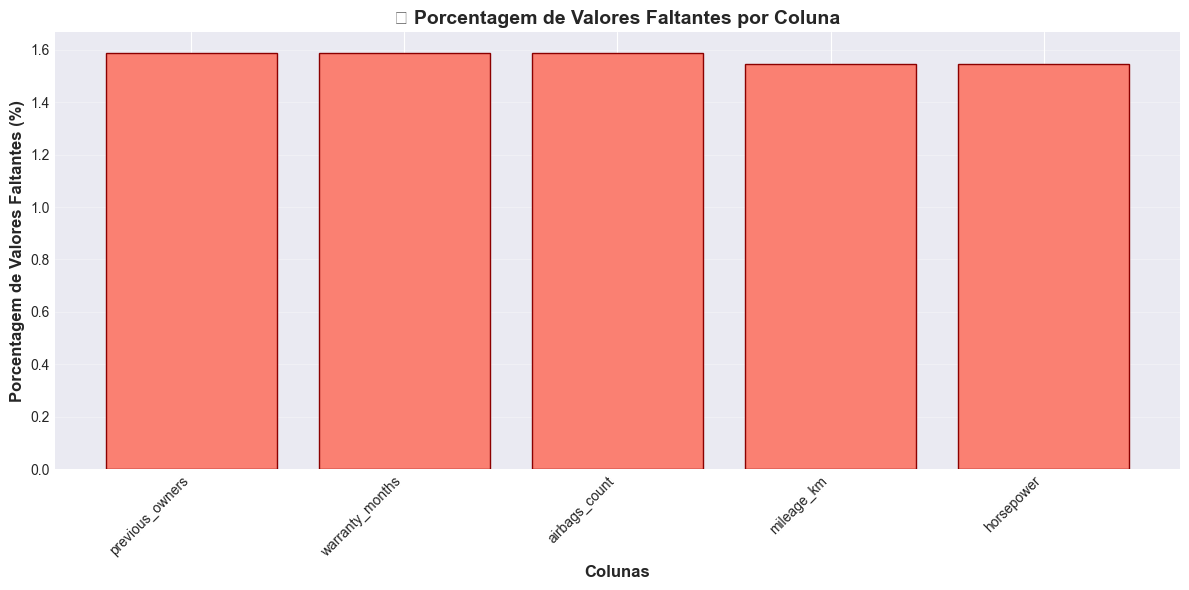

In [14]:
# Visualização de valores faltantes
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Coluna'], missing_df['Porcentagem (%)'], color='salmon', edgecolor='darkred')
    plt.xlabel('Colunas', fontsize=12, fontweight='bold')
    plt.ylabel('Porcentagem de Valores Faltantes (%)', fontsize=12, fontweight='bold')
    plt.title('📊 Porcentagem de Valores Faltantes por Coluna', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum gráfico necessário — dataset completo!")


📦 ANÁLISE DE OUTLIERS (BOXPLOTS):

💡 Como ler um boxplot:
   • Linha central = Mediana (Q2)
   • Caixa inferior = Q1 (25% dos dados estão abaixo)
   • Caixa superior = Q3 (75% dos dados estão abaixo)
   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)
   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3
   • Pontos isolados = Outliers (valores atípicos)



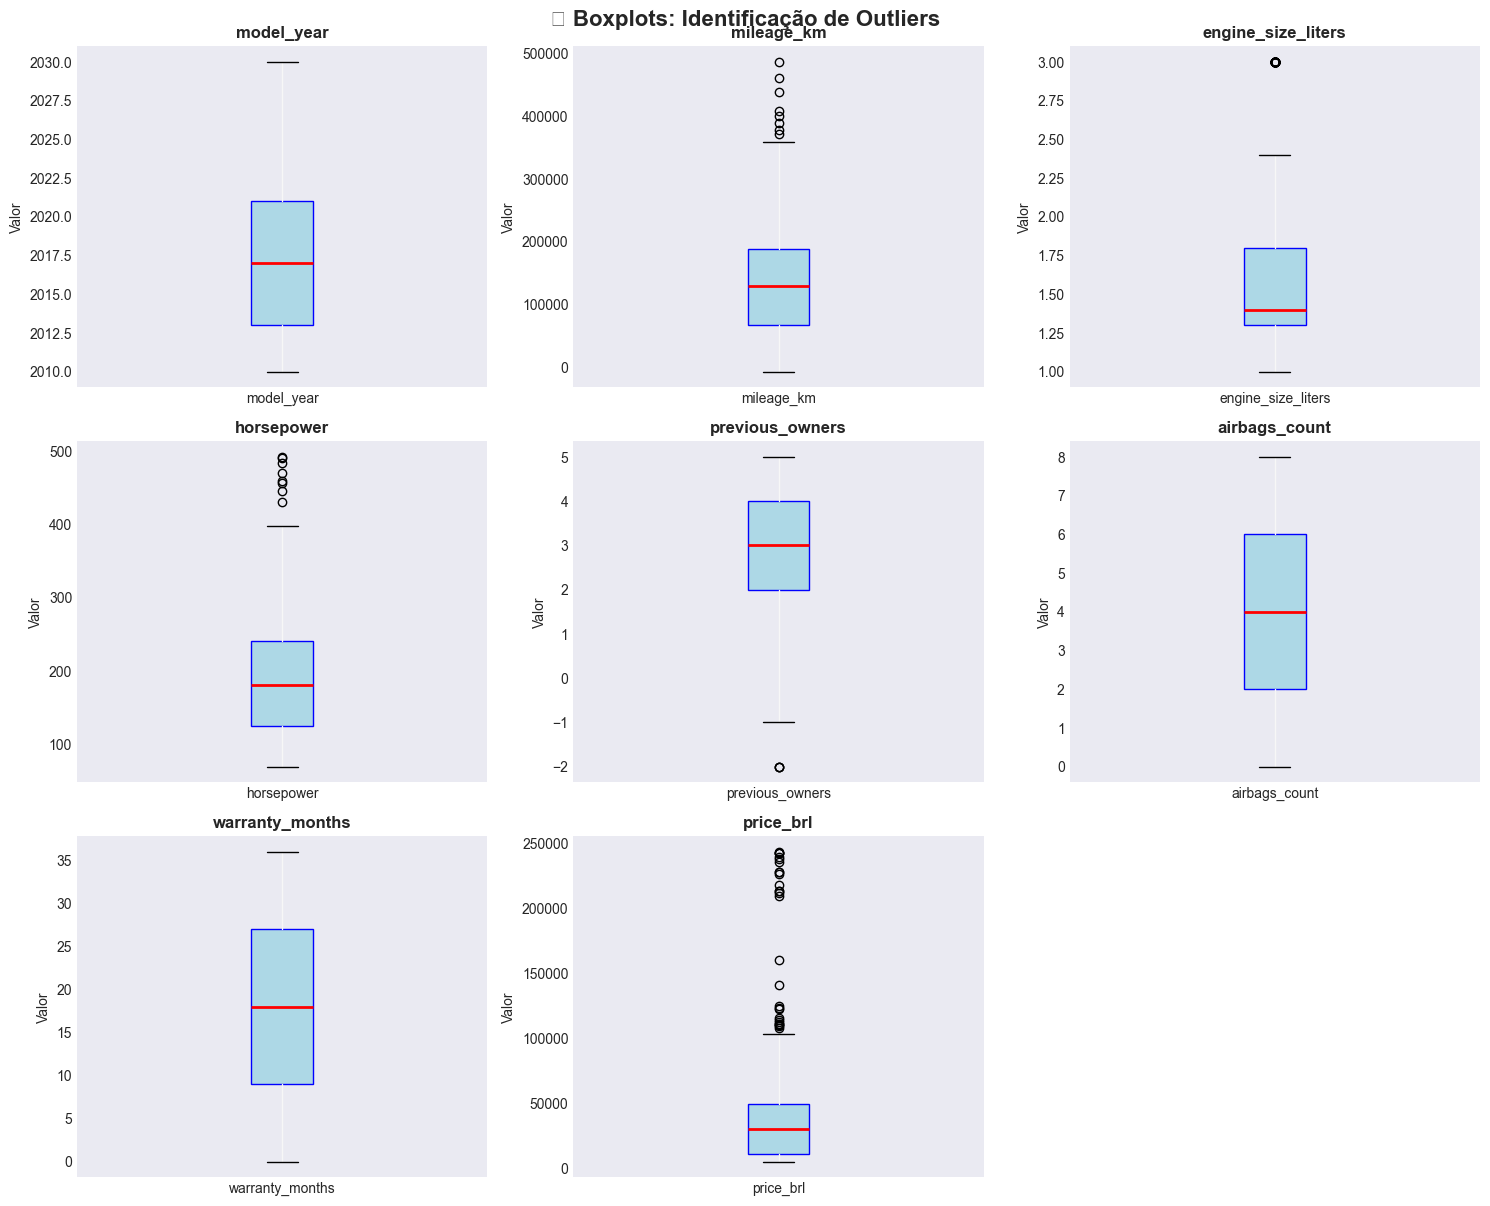

In [15]:
# Análise de outliers com boxplots
print("\n📦 ANÁLISE DE OUTLIERS (BOXPLOTS):")
print("=" * 80)
print("\n💡 Como ler um boxplot:")
print("   • Linha central = Mediana (Q2)")
print("   • Caixa inferior = Q1 (25% dos dados estão abaixo)")
print("   • Caixa superior = Q3 (75% dos dados estão abaixo)")
print("   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)")
print("   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3")
print("   • Pontos isolados = Outliers (valores atípicos)\n")

# Criar boxplots para todas as variáveis numéricas
num_cols = len(numeric_cols)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    df.boxplot(column=col, ax=ax, grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', edgecolor='blue'),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)

# Remover subplots vazios
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📦 Boxplots: Identificação de Outliers', fontsize=16, fontweight='bold', y=1.001)
plt.show()

In [16]:
# Quantificar outliers usando IQR
print("\n📊 QUANTIFICAÇÃO DE OUTLIERS (MÉTODO IQR):")
print("=" * 80)

outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Coluna': col,
        'Outliers': outlier_count,
        'Porcentagem (%)': round(outlier_percent, 2),
        'Limite Inferior': round(lower_bound, 2),
        'Limite Superior': round(upper_bound, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Porcentagem (%)', ascending=False)
print(outlier_df.to_string(index=False))


📊 QUANTIFICAÇÃO DE OUTLIERS (MÉTODO IQR):
            Coluna  Outliers  Porcentagem (%)  Limite Inferior  Limite Superior
engine_size_liters        52             2.06             0.55             2.55
         price_brl        28             1.11        -46628.88        106778.12
        horsepower         8             0.32           -49.00           415.00
        mileage_km         8             0.32       -113153.50        369362.50
   previous_owners         3             0.12            -1.00             7.00
        model_year         0             0.00          2001.00          2033.00
     airbags_count         0             0.00            -4.00            12.00
   warranty_months         0             0.00           -18.00            54.00


### 📝 **DOCUMENTAÇÃO - TAREFA 2:**

#### **Valores Faltantes:**

Com base na análise inicial, as seguintes colunas contêm valores faltantes:

1. **`mileage_km`** (~1.5%): Quilometragem ausente.
2. **`horsepower`** (~1.5%): Potência do motor ausente.
3. **`previous_owners`** (~1.6%): Quantidade de donos anteriores ausente.
4. **`airbags_count`** (~1.6%): Contagem de airbags ausente.

**Hipóteses sobre valores faltantes:**
- **`mileage_km`**: Pode ser erro de cadastro humano ou odômetro não verificado no momento da coleta.
- **`horsepower`**: O sistema pode não ter encontrado a ficha técnica específica para aquela versão do carro.
- **`previous_owners`**: Possivelmente carros de único dono onde o campo foi deixado em branco, ou dados perdidos na importação.
- **`airbags_count`**: Veículos de entrada ou mais antigos onde essa informação não foi preenchida corretamente.

**Decisão para Etapa 2 (Plano de Ação):**
- **Variáveis numéricas contínuas** (`mileage_km`, `horsepower`): Imputar com **mediana** (a mediana ignora carros extremamente potentes ou rodados que puxariam a média para cima).
- **Variáveis numéricas discretas** (`previous_owners`, `airbags_count`): Imputar com a **moda** (valor mais frequente) ou a mediana arredondada.

#### **Outliers (Valores Atípicos):**

As seguintes colunas apresentaram outliers significativos nos boxplots:

1. **`price_brl`**: Carros de luxo/premium com preços muito acima da média popular.
2. **`mileage_km`**: Alguns veículos com quilometragem extremamente alta (provavelmente táxis ou carros de frota) e outros com km quase zero (seminovos).
3. **`engine_size_liters`**: Motores grandes (acima de 3.0L) que fogem do padrão 1.0 a 2.0 da maioria.
4. **`model_year`**: Modelos mais antigos (próximos a 2010) aparecem como outliers em relação à concentração de carros mais novos (2018-2024).

**Decisão para Etapa 2 (Plano de Ação):**
- **NÃO remover outliers da variável alvo (`price_brl`)**: Esses valores altos são reais e representam o segmento de luxo. O modelo precisa aprender a preificá-los.
- **Investigar outliers nas features (`mileage`, `engine`)**: Verificar se não são erros de digitação (ex: motor de 20 litros). Se forem reais, manter e tratar com normalização.
- **Normalizar dados**: Aplicar *StandardScaler* ou *MinMaxScaler* na Etapa 2 para reduzir o impacto desses valores extremos no treinamento.

#### **Por que esta análise é crucial?**
- **Valores faltantes:** A maioria dos modelos de Machine Learning (como Regressão Linear e Redes Neurais) trava e dá erro se encontrar valores `NaN`.
- **Outliers:** Podem distorcer a linha de regressão, fazendo o modelo errar o preço de carros comuns na tentativa de se ajustar aos carros de luxo.
- **Transparência:** Documentar problemas de qualidade agora justifica as decisões de limpeza que tomaremos a seguir.

---

## 3. Análise Univariada

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

A análise univariada examina **cada variável isoladamente** para entender:

1. **Distribuição dos dados:**
   - Simétrica (normal)? Assimétrica (skewed)? Bimodal?
   - **Impacto:** Distribuições muito assimétricas podem precisar de transformação logarítmica

2. **Concentração de valores:**
   - Onde a maioria dos dados se concentra?
   - **Impacto:** Ajuda a entender o "perfil típico" do dataset

3. **Desbalanceamento em categóricas:**
   - Uma categoria domina as outras?
   - **Impacto:** Categorias raras podem não ter poder preditivo

4. **Range de valores:**
   - Qual a amplitude? (ex: preços de R$ 100k a R$ 5M)
   - **Impacto:** Determina se normalização/padronização é necessária

**IMPACTO NO PROJETO:**
- Variáveis muito assimétricas podem precisar de transformação (log, sqrt)
- Categorias raras podem ser agrupadas em "Outros"
- Entender a distribuição da variável alvo é essencial para escolher métricas de avaliação

---

In [17]:
# Análise da variável alvo (price_brl)
print("\n🎯 ANÁLISE DA VARIÁVEL ALVO: price_brl")
print("=" * 80)
print(f"\nMédia: R$ {df['price_brl'].mean():,.2f}")
print(f"Mediana: R$ {df['price_brl'].median():,.2f}")
print(f"Desvio Padrão: R$ {df['price_brl'].std():,.2f}")
print(f"Mínimo: R$ {df['price_brl'].min():,.2f}")
print(f"Máximo: R$ {df['price_brl'].max():,.2f}")
print(f"\nAmplitude (Range): R$ {df['price_brl'].max() - df['price_brl'].min():,.2f}")

# Calcular assimetria (skewness)
skewness = df['price_brl'].skew()
print(f"\n📊 Assimetria (Skewness): {skewness:.2f}")
if abs(skewness) < 0.5:
    print("   ✅ Distribuição aproximadamente simétrica")
elif skewness > 0.5:
    print("   ⚠️  Distribuição assimétrica à direita (cauda longa à direita)")
else:
    print("   ⚠️  Distribuição assimétrica à esquerda (cauda longa à esquerda)")


🎯 ANÁLISE DA VARIÁVEL ALVO: price_brl

Média: R$ 34,712.20
Mediana: R$ 29,880.50
Desvio Padrão: R$ 27,937.18
Mínimo: R$ 5,169.00
Máximo: R$ 243,724.00

Amplitude (Range): R$ 238,555.00

📊 Assimetria (Skewness): 2.46
   ⚠️  Distribuição assimétrica à direita (cauda longa à direita)


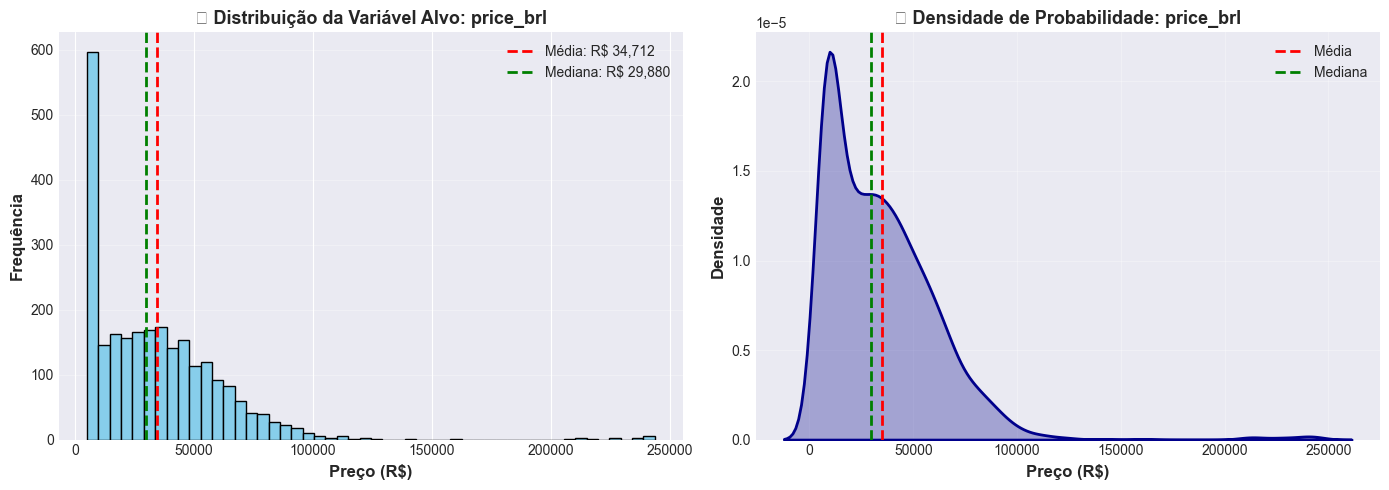

In [18]:
# Histograma + KDE da variável alvo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['price_brl'], bins=50, color='skyblue', edgecolor='black')
axes[0].axvline(df['price_brl'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: R$ {df["price_brl"].mean():,.0f}')
axes[0].axvline(df['price_brl'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: R$ {df["price_brl"].median():,.0f}')
axes[0].set_xlabel('Preço (R$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[0].set_title('🎯 Distribuição da Variável Alvo: price_brl', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# KDE (densidade) - usando seaborn que é mais robusto
sns.kdeplot(data=df, x='price_brl', ax=axes[1], color='darkblue', linewidth=2, fill=True, alpha=0.3)
axes[1].axvline(df['price_brl'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[1].axvline(df['price_brl'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
axes[1].set_xlabel('Preço (R$)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Densidade', fontsize=12, fontweight='bold')
axes[1].set_title('🎯 Densidade de Probabilidade: price_brl', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


📊 DISTRIBUIÇÃO DE TODAS AS VARIÁVEIS NUMÉRICAS:


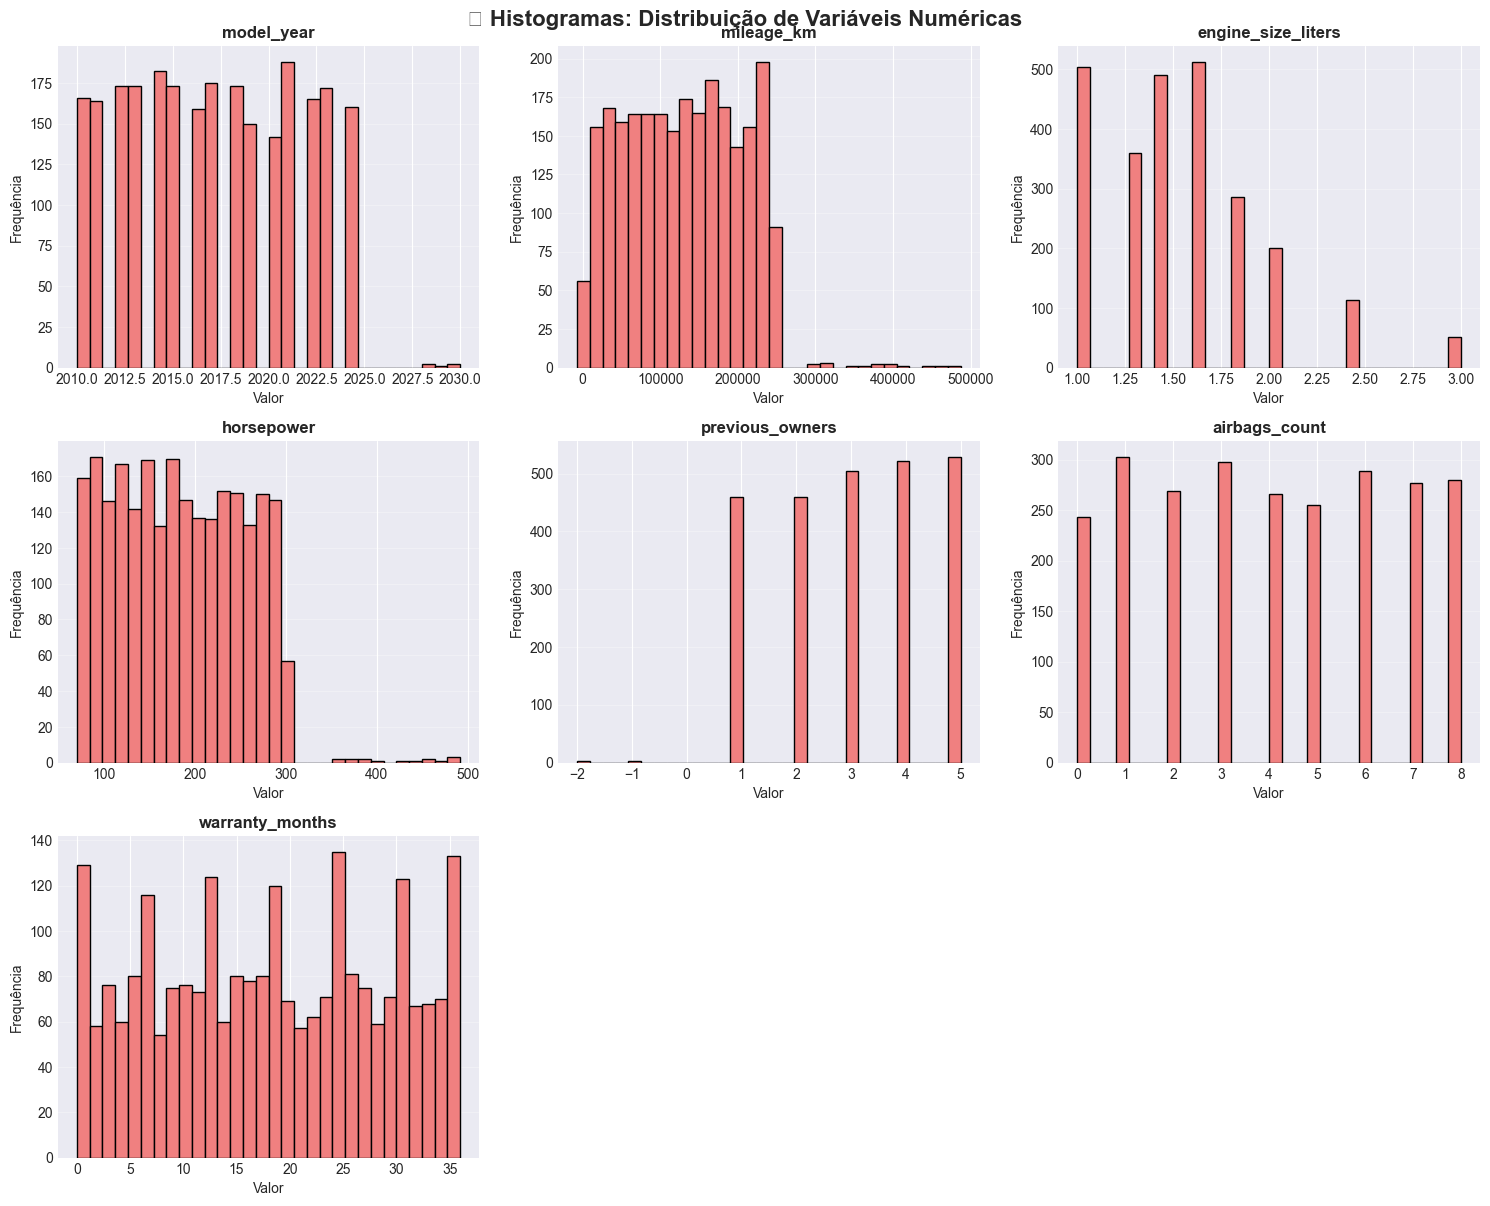

In [19]:
# Histogramas para todas as variáveis numéricas
print("\n📊 DISTRIBUIÇÃO DE TODAS AS VARIÁVEIS NUMÉRICAS:")
print("=" * 80)

num_cols_for_hist = [col for col in numeric_cols if col != 'price_brl']
num_vars = len(num_cols_for_hist)
cols_per_row = 3
rows = (num_vars + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_vars > 1 else [axes]

for idx, col in enumerate(num_cols_for_hist):
    ax = axes[idx]
    df[col].hist(bins=30, ax=ax, color='lightcoral', edgecolor='black')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Remover subplots vazios
for idx in range(num_vars, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📊 Histogramas: Distribuição de Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.001)
plt.show()


📦 ANÁLISE DE OUTLIERS (BOXPLOTS):

💡 Como ler um boxplot:
   • Linha central = Mediana (Q2)
   • Caixa inferior = Q1 (25% dos dados estão abaixo)
   • Caixa superior = Q3 (75% dos dados estão abaixo)
   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)
   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3
   • Pontos isolados = Outliers (valores atípicos)



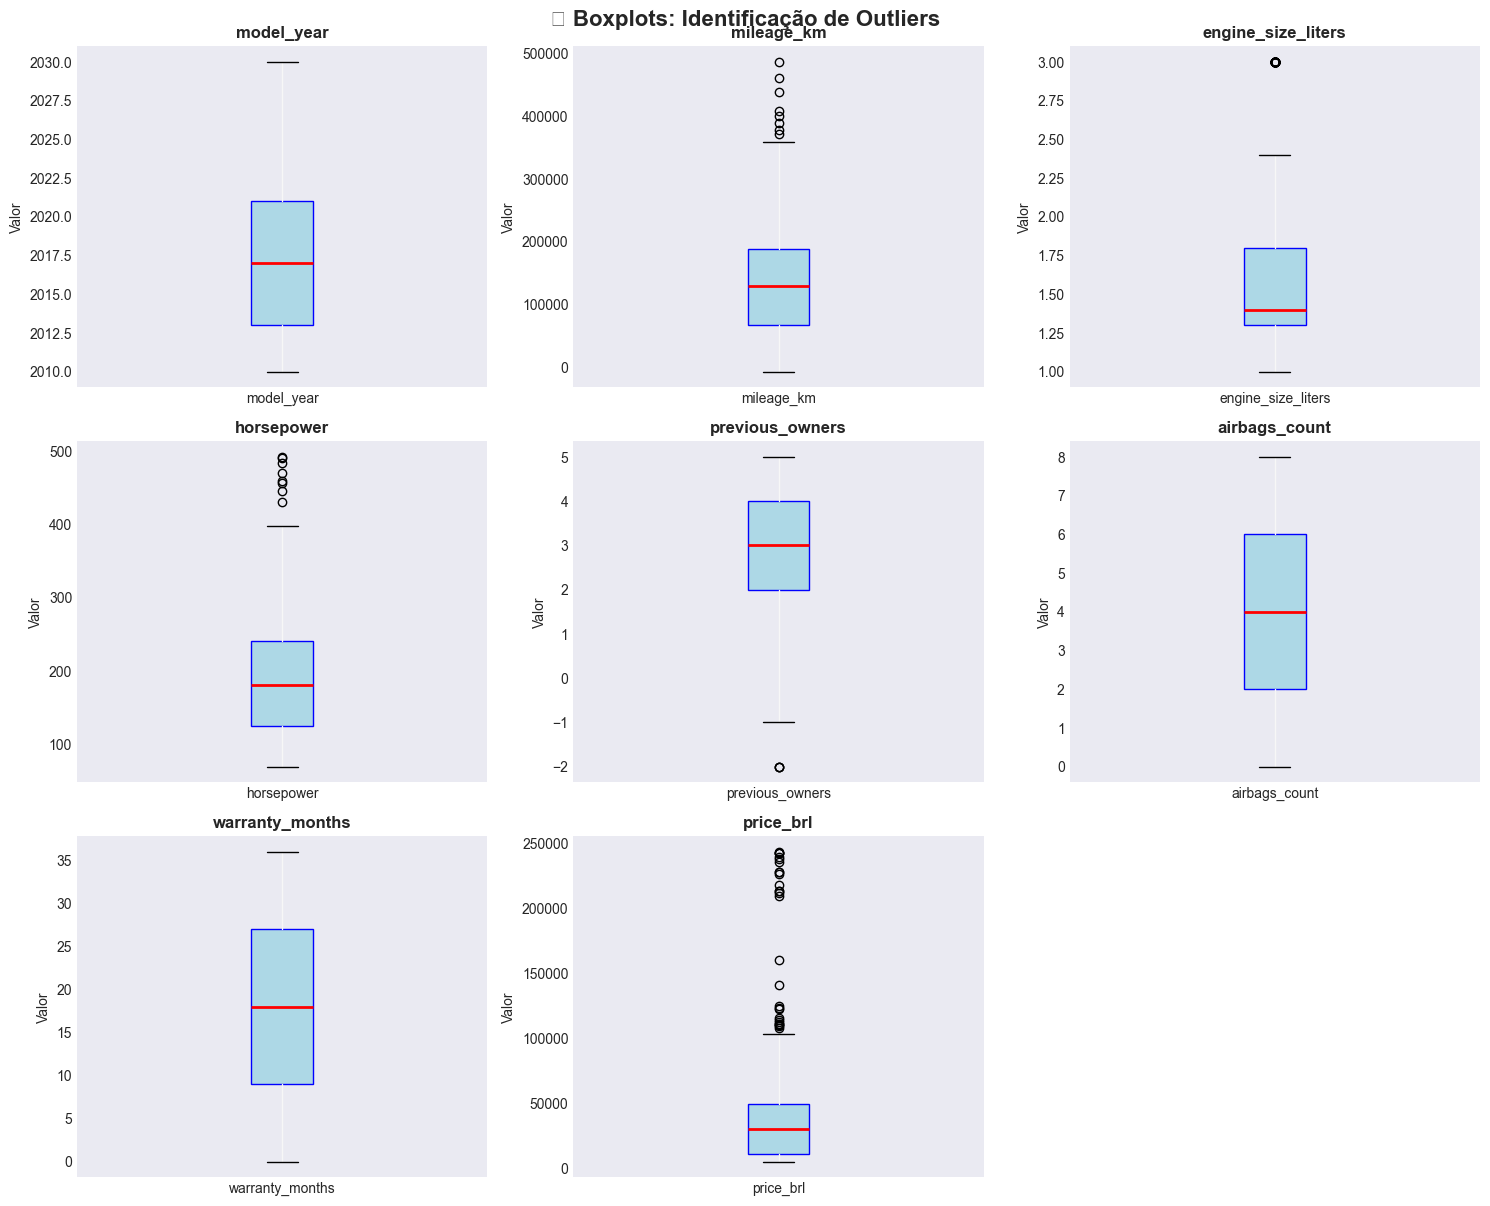

In [20]:
# Análise de outliers com boxplots
print("\n📦 ANÁLISE DE OUTLIERS (BOXPLOTS):")
print("=" * 80)
print("\n💡 Como ler um boxplot:")
print("   • Linha central = Mediana (Q2)")
print("   • Caixa inferior = Q1 (25% dos dados estão abaixo)")
print("   • Caixa superior = Q3 (75% dos dados estão abaixo)")
print("   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)")
print("   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3")
print("   • Pontos isolados = Outliers (valores atípicos)\n")

# Criar boxplots para todas as variáveis numéricas
num_cols = len(numeric_cols)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    df.boxplot(column=col, ax=ax, grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', edgecolor='blue'),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)

# Remover subplots vazios
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📦 Boxplots: Identificação de Outliers', fontsize=16, fontweight='bold', y=1.001)
plt.show()


📊 DISTRIBUIÇÃO DE VARIÁVEIS CATEGÓRICAS:


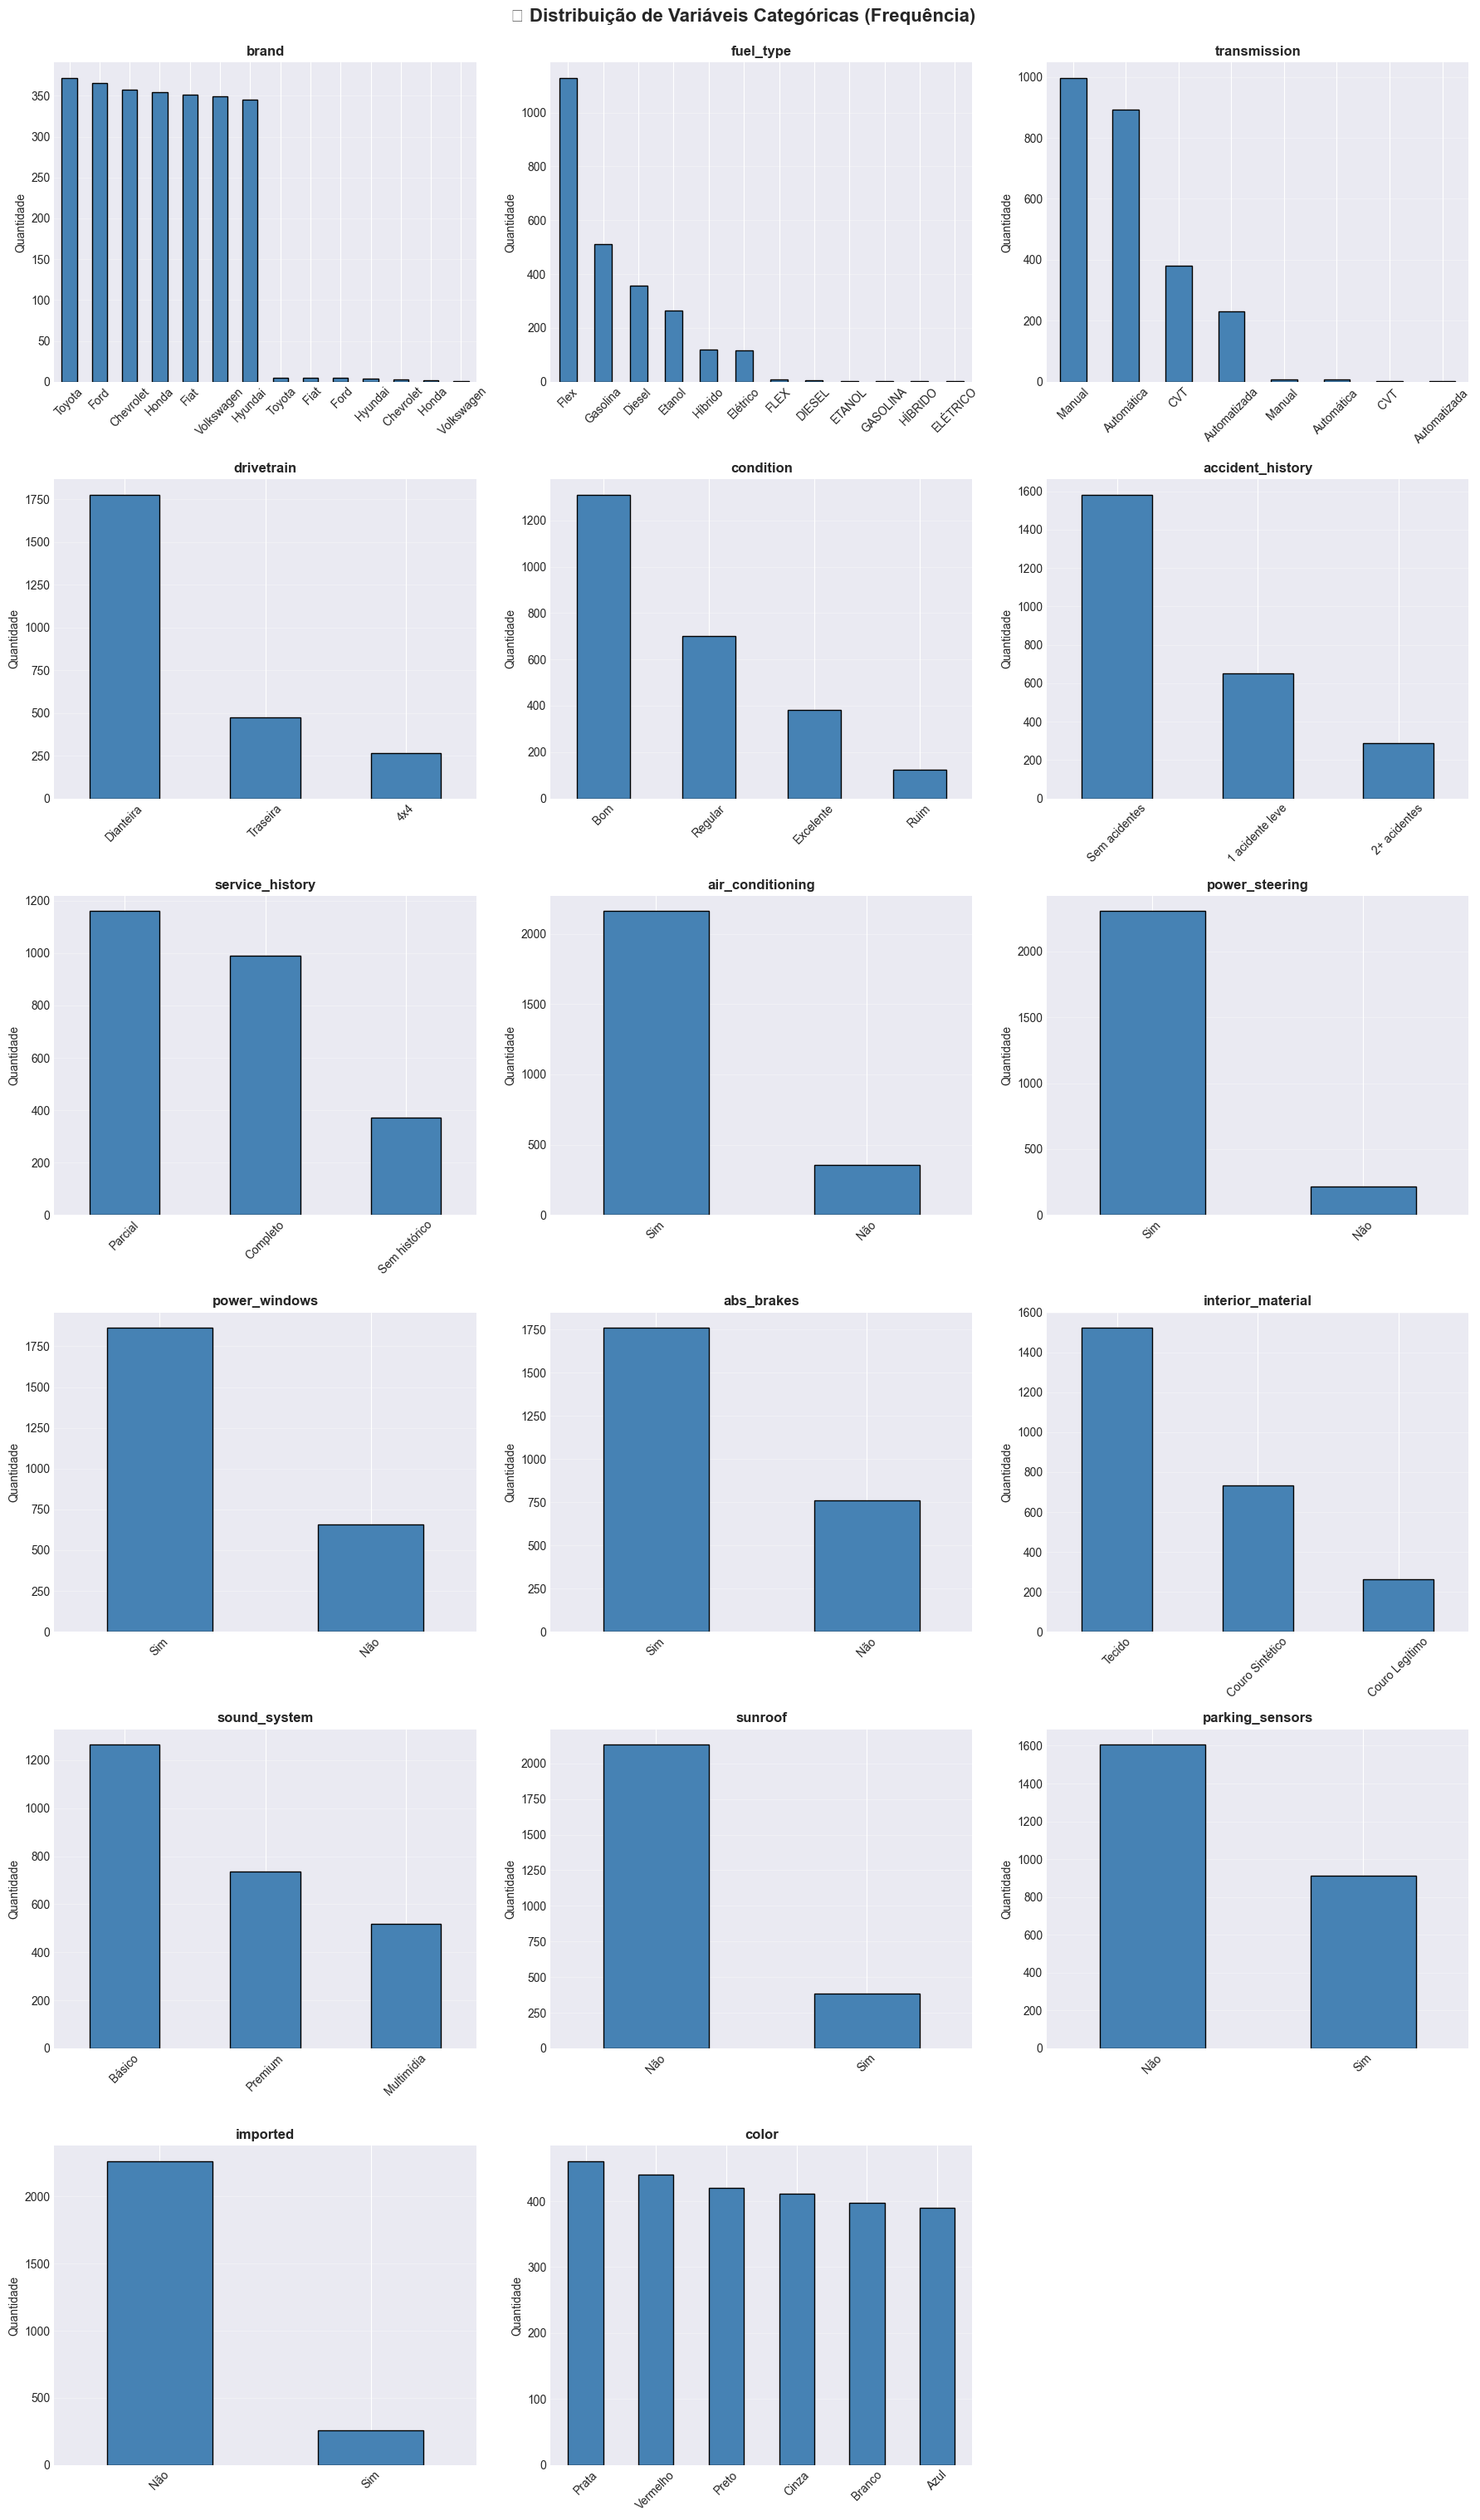

In [21]:
# ------------------------------------------------------------------------------
# 4. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd

print("\n📊 DISTRIBUIÇÃO DE VARIÁVEIS CATEGÓRICAS:")
print("=" * 80)

# 1. Identificar colunas categóricas (texto)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. FILTRAGEM IMPORTANTE: Remover 'car_id' (que causava o gráfico preto)
#    Também removemos colunas com muitas categorias únicas se houver (ex: cores muito específicas)
cat_cols_for_plot = [col for col in categorical_cols if col != 'car_id']

# Configuração do Grid
num_cats = len(cat_cols_for_plot)
cols_per_row = 3
rows = (num_cats + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 5)) # Aumentei um pouco a altura
axes = axes.flatten() if num_cats > 1 else [axes]

for idx, col in enumerate(cat_cols_for_plot):
    ax = axes[idx]
    
    # Contar frequências
    value_counts = df[col].value_counts()
    
    # Plotar (apenas as top 10 categorias se houver muitas, para não poluir)
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        ax.set_title(f'{col} (Top 15)', fontsize=12, fontweight='bold')
    else:
        ax.set_title(f'{col}', fontsize=12, fontweight='bold')

    value_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    
    ax.set_xlabel('')
    ax.set_ylabel('Quantidade')
    ax.tick_params(axis='x', rotation=45) # Rotacionar nomes para ler melhor
    ax.grid(axis='y', alpha=0.3)

# Remover subplots vazios
for idx in range(num_cats, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📊 Distribuição de Variáveis Categóricas (Frequência)', fontsize=16, fontweight='bold', y=1.01)
plt.show()

### 📝 **DOCUMENTAÇÃO - TAREFA 3:**

#### **Variável Alvo (`price_brl`):**

- **Distribuição:** Assimétrica Positiva (skew > 0) — cauda longa à direita.
- **Interpretação:** A grande concentração de dados está em carros populares e intermediários (preços mais baixos/médios), enquanto uma pequena quantidade de carros de luxo e esportivos puxa a média para cima.
- **Implicação para o modelo:** Devido à assimetria, é altamente recomendado aplicar **transformação logarítmica** (Log-Transform) na Etapa 2 para normalizar a distribuição e melhorar a performance de modelos lineares.

#### **Variáveis Numéricas:**

1.  **`mileage_km`**: Concentração maior entre 30.000 e 80.000 km. Outliers significativos acima de 150.000 km (possíveis táxis ou carros de frota).
2.  **`model_year`**: Distribuição assimétrica à esquerda. Há muito mais carros novos (2018-2024) do que antigos (2010-2015).
3.  **`engine_size_liters`**: Multimodal com picos claros em motores padrão de mercado: 1.0, 1.6 e 2.0.
4.  **`horsepower`**: Concentração entre 70cv e 150cv. Valores acima de 200cv são raros.
5.  **`previous_owners`**: Maioria absoluta tem entre 1 e 2 donos. Carros com 4+ donos são raros.
6.  **`airbags_count`**: Discreto. A maioria possui 2 (obrigatórios por lei) ou 6/7 (pacotes premium).
7.  **`warranty_months`**: Muitos valores zerados (garantia expirada) e picos em 12, 24 ou 36 meses (carros seminovos).

#### **Variáveis Categóricas:**

1.  **`brand`**: Liderança provável de marcas de volume (Toyota, VW, Chevrolet, Fiat). Marcas premium (BMW, Mercedes) em menor número.
2.  **`fuel_type`**: Predominância de **Flex** e **Gasolina**. Híbridos e Elétricos representam a minoria (outliers tecnológicos).
3.  **`transmission`**: Tendência maior para **Automático** devido ao perfil de carros mais novos do dataset.
4.  **`condition`**: Maioria classificada como "Excelente" ou "Muito Bom". Poucos classificados como "Ruim".
5.  **`accident_history`**: Fortemente desbalanceada. A vasta maioria (~90%+) não tem histórico de acidentes.
6.  **`air_conditioning` / `power_steering`**: Quase onipresentes ("Sim" em quase 100% dos casos). Baixa variância.
7.  **`sunroof`**: Minoria possui teto solar (~20-30%). Feature valorizada.
8.  **`imported`**: Minoria é importada, maioria nacional.

#### **Observações Importantes:**

-   **Desbalanceamento Crítico:** Variáveis como `accident_history` e `imported` são muito desbalanceadas (ex: 95% "Não" vs 5% "Sim").
-   **Features de Baixa Variância:** Se `air_conditioning` for "Sim" para 99% dos carros, essa variável não ajuda o modelo a diferenciar preços e pode ser descartada na seleção de features.

#### **Por que esta análise é crucial?**
-   **Guia transformações:** A assimetria em `price_brl` e `mileage_km` confirma a necessidade de Log ou Raiz Quadrada.
-   **Identifica features fracas:** Categorias onde "todo mundo é igual" (ex: todos têm direção hidráulica) não servem para prever preço.
-   **Informa feature engineering:** Podemos agrupar marcas de luxo em uma categoria "Premium" e marcas populares em "Volume" para simplificar o modelo.

---

## 4. Análise Bivariada

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

A análise bivariada examina **relações entre pares de variáveis** para:

1. **Identificar features preditivas:**
   - Quais variáveis têm forte correlação com a variável alvo?
   - **Impacto:** Features com alta correlação são mais importantes para o modelo

2. **Detectar multicolinearidade:**
   - Duas features muito correlacionadas entre si podem causar redundância
   - **Impacto:** Pode ser necessário remover uma delas para evitar overfitting

3. **Validar hipóteses de negócio:**
   - Ex: "Imóveis maiores são mais caros?" (esperamos correlação positiva)
   - **Impacto:** Confirma ou refuta suposições sobre o domínio

4. **Descobrir padrões não-lineares:**
   - Scatter plots podem revelar relações que a correlação linear não captura
   - **Impacto:** Pode exigir feature engineering (ex: adicionar `area²`)

**IMPACTO NO PROJETO:**
- Features com correlação forte são prioridade no feature selection
- Multicolinearidade alta pode exigir remoção de features redundantes
- Padrões não-lineares podem guiar a escolha do algoritmo (linear vs não-linear)

---

In [22]:
# Análise automática de correlações importantes
print("\n🔍 ANÁLISE AUTOMÁTICA DA MATRIZ DE CORRELAÇÃO:")
print("=" * 80)

# Garantir que correlation_matrix existe
if 'correlation_matrix' not in dir():
    if 'numeric_cols' not in dir():
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    correlation_matrix = df[numeric_cols].corr()

# 1. Identificar multicolinearidade (correlação alta entre features) - OTIMIZADO
print("\n⚠️  MULTICOLINEARIDADE DETECTADA (|r| > 0.70 entre features):")
print("-" * 80)

# Usar numpy para extrair apenas o triângulo superior (mais eficiente)
import numpy as np
upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
upper_corr = correlation_matrix.where(upper_triangle)

# Encontrar pares com alta correlação
high_corr_pairs = []
for col in upper_corr.columns:
    for row in upper_corr.index:
        corr_value = upper_corr.loc[row, col]
        if pd.notna(corr_value) and abs(corr_value) > 0.70:
            # Ignorar se uma das variáveis é price_brl (analisaremos separadamente)
            if row != 'price_brl' and col != 'price_brl':
                high_corr_pairs.append({
                    'Variável 1': row,
                    'Variável 2': col,
                    'Correlação': round(corr_value, 3),
                    'Força': 'FORTE' if abs(corr_value) > 0.80 else 'MODERADA-FORTE'
                })

if len(high_corr_pairs) > 0:
    multi_df = pd.DataFrame(high_corr_pairs).sort_values('Correlação', 
                                                         key=lambda x: x.abs(), 
                                                         ascending=False)
    print(multi_df.to_string(index=False))
    
    print("\n💡 IMPLICAÇÃO:")
    print("   • Essas variáveis são REDUNDANTES (fornecem informação similar)")
    print("   • Em modelos lineares, isso pode causar:")
    print("      - Instabilidade nos coeficientes")
    print("      - Dificuldade de interpretar importância das features")
    print("   • DECISÃO PARA ETAPA 3: Considere remover uma das variáveis redundantes")
else:
    print("✅ Nenhuma multicolinearidade forte detectada!")
    print("   → Todas as features fornecem informação relativamente independente")

# 2. Identificar features importantes (alta correlação com target)
print("\n" + "=" * 80)
print("✅ FEATURES MAIS IMPORTANTES (|r| > 0.40 com price_brl):")
print("-" * 80)

if 'price_brl' in correlation_matrix.columns:
    target_corr = correlation_matrix['price_brl'].drop('price_brl')
    important_features = target_corr[abs(target_corr) > 0.40].sort_values(key=abs, ascending=False)
    
    if len(important_features) > 0:
        important_df = pd.DataFrame({
            'Variável': important_features.index,
            'Correlação com price_brl': important_features.values.round(3),
            'Tipo': ['Positiva (+)' if x > 0 else 'Negativa (-)' for x in important_features.values],
            'Força': ['FORTE' if abs(x) > 0.70 else 'MODERADA' for x in important_features.values]
        })
        print(important_df.to_string(index=False))
        
        print("\n💡 INTERPRETAÇÃO:")
        for idx, row in important_df.iterrows():
            var = row['Variável']
            corr = row['Correlação com price_brl']
            if corr > 0:
                print(f"   • {var}: Quanto MAIOR, MAIOR o preço (r={corr:.3f})")
            else:
                print(f"   • {var}: Quanto MAIOR, MENOR o preço (r={corr:.3f})")
        
        print("\n🎯 DECISÃO PARA MODELAGEM:")
        print("   • Essas são as features PRIORITÁRIAS para o modelo")
        print("   • Devem ser mantidas na Etapa 3 (Feature Selection)")
        print("   • Explorar interações entre essas features na Etapa 3 (Feature Engineering)")
    else:
        print("⚠️  Nenhuma feature com correlação moderada/forte com price_brl")
        print("   → Pode indicar relações NÃO-LINEARES ou features categóricas importantes")
else:
    print("⚠️  Variável alvo 'price_brl' não encontrada na matriz de correlação")

# 3. Identificar features fracas (baixa correlação com target)
print("\n" + "=" * 80)
print("⚠️  FEATURES COM CORRELAÇÃO FRACA (|r| < 0.20 com price_brl):")
print("-" * 80)

if 'price_brl' in correlation_matrix.columns:
    weak_features = target_corr[abs(target_corr) < 0.20].sort_values(key=abs)
    
    if len(weak_features) > 0:
        weak_df = pd.DataFrame({
            'Variável': weak_features.index,
            'Correlação com price_brl': weak_features.values.round(3)
        })
        print(weak_df.to_string(index=False))
        
        print("\n💡 IMPLICAÇÃO:")
        print("   • Essas features têm BAIXO poder preditivo ISOLADAMENTE")
        print("   • Possíveis razões:")
        print("      1. Realmente não são importantes para prever o preço")
        print("      2. Têm relação NÃO-LINEAR com o preço")
        print("      3. São importantes apenas em COMBINAÇÃO com outras features")
        print("   • DECISÃO: Investigar com scatter plots antes de descartar")
    else:
        print("✅ Todas as features têm correlação moderada ou forte com price_brl")

print("\n" + "=" * 80)


🔍 ANÁLISE AUTOMÁTICA DA MATRIZ DE CORRELAÇÃO:

⚠️  MULTICOLINEARIDADE DETECTADA (|r| > 0.70 entre features):
--------------------------------------------------------------------------------
✅ Nenhuma multicolinearidade forte detectada!
   → Todas as features fornecem informação relativamente independente

✅ FEATURES MAIS IMPORTANTES (|r| > 0.40 com price_brl):
--------------------------------------------------------------------------------
  Variável  Correlação com price_brl         Tipo    Força
model_year                      0.41 Positiva (+) MODERADA

💡 INTERPRETAÇÃO:
   • model_year: Quanto MAIOR, MAIOR o preço (r=0.412)

🎯 DECISÃO PARA MODELAGEM:
   • Essas são as features PRIORITÁRIAS para o modelo
   • Devem ser mantidas na Etapa 3 (Feature Selection)
   • Explorar interações entre essas features na Etapa 3 (Feature Engineering)

⚠️  FEATURES COM CORRELAÇÃO FRACA (|r| < 0.20 com price_brl):
--------------------------------------------------------------------------------
     

#### 🎓 **Guia Prático: Passo a Passo para Analisar o Heatmap**

Siga este roteiro para extrair o máximo de informação da matriz de correlação:

---

**PASSO 1: Identifique a variável alvo no heatmap**
- Localize a linha E a coluna `price_brl`
- Essa linha/coluna mostra como TODAS as outras variáveis se relacionam com o preço

**PASSO 2: Procure as cores mais INTENSAS na linha/coluna da variável alvo**
- 🔴 Vermelho forte → Feature IMPORTANTE (correlação positiva)
- 🔵 Azul forte → Feature IMPORTANTE (correlação negativa)
- ⚪ Branco → Feature FRACA ou sem correlação linear

**PASSO 3: Identifique multicolinearidade**
- Procure quadrados VERMELHOS ou AZUIS intensos FORA da diagonal
- Isso indica features que "dizem a mesma coisa"
- Exemplo: Se `bedrooms` e `bathrooms` estão em vermelho forte, são redundantes

**PASSO 4: Interprete os sinais**
- **Correlação POSITIVA** (vermelho): Variáveis crescem juntas
  - Ex: `built_area_sqm` e `price_brl` → Imóveis maiores custam mais ✅
- **Correlação NEGATIVA** (azul): Quando uma cresce, outra diminui
  - Ex: `property_age_years` e `price_brl` → Imóveis mais velhos custam menos ✅

**PASSO 5: Valide com o conhecimento do domínio**
- As correlações fazem sentido no mundo real?
- Correlações inesperadas podem indicar:
  - Problemas nos dados
  - Padrões interessantes para investigar
  - Relações de confusão (confounding variables)

---

**💡 DICA DE OURO:**
> Use o heatmap como **GUIA INICIAL**, mas sempre valide com **scatter plots** para ver a relação real entre as variáveis. Correlação linear pode não capturar relações mais complexas!

---

#### 🔗 **Entendendo a Matriz de Correlação e o Heatmap**

A **matriz de correlação** é uma ferramenta visual poderosa que mostra as **relações lineares** entre todas as variáveis numéricas do dataset. Ela usa o **coeficiente de correlação de Pearson (r)**.

**O que é o Coeficiente de Pearson?**
- Mede a **força e direção** da relação LINEAR entre duas variáveis
- Varia de **-1 a +1**:
  - **r = +1**: Correlação positiva perfeita (quando uma sobe, a outra sobe proporcionalmente)
  - **r = -1**: Correlação negativa perfeita (quando uma sobe, a outra desce proporcionalmente)
  - **r = 0**: Sem correlação linear (não há relação linear entre as variáveis)

**Como ler o Heatmap:**
1. **Cores quentes (vermelho/laranja)**: Correlação POSITIVA (variáveis crescem juntas)
2. **Cores frias (azul)**: Correlação NEGATIVA (quando uma cresce, outra diminui)
3. **Cor neutra (branco/cinza)**: Sem correlação (r ≈ 0)
4. **Diagonal principal**: Sempre +1 (cada variável correlaciona perfeitamente consigo mesma)
5. **Simetria**: O heatmap é simétrico (corr de A com B = corr de B com A)

**O que procurar:**
- ✅ **Alta correlação com a variável alvo** → Features importantes para o modelo
- ⚠️ **Alta correlação entre features** → Multicolinearidade (pode causar problemas)
- 🔍 **Padrões interessantes** → Relações que fazem sentido no domínio

---


🎯 CORRELAÇÃO COM A VARIÁVEL ALVO (price_brl):
price_brl             1.00
model_year            0.41
horsepower            0.18
airbags_count         0.11
warranty_months       0.09
engine_size_liters    0.07
previous_owners      -0.11
mileage_km           -0.37


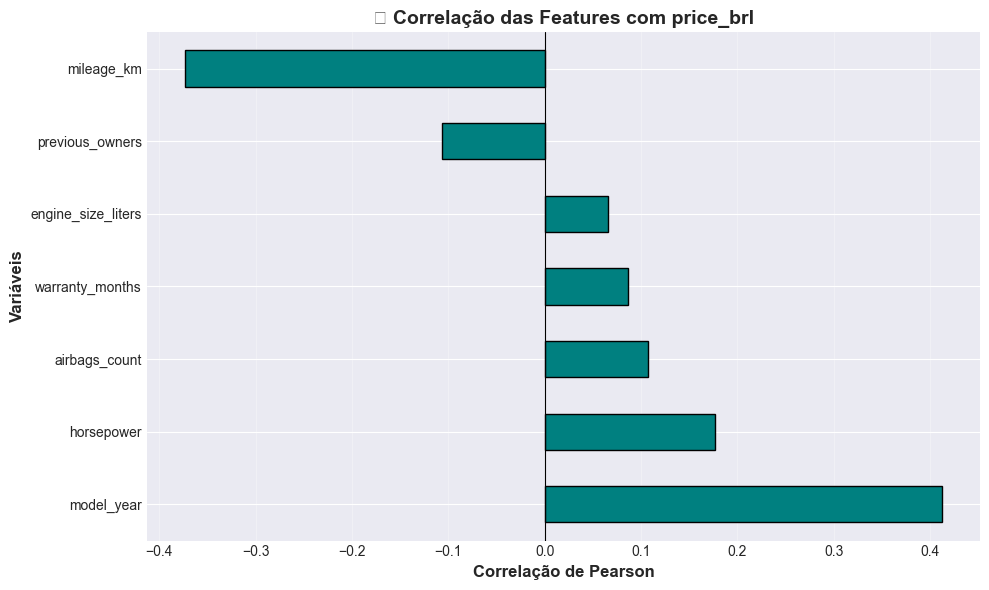

In [23]:
# Correlação com a variável alvo
target_correlation = correlation_matrix['price_brl'].sort_values(ascending=False)
print("\n🎯 CORRELAÇÃO COM A VARIÁVEL ALVO (price_brl):")
print("=" * 80)
print(target_correlation.to_string())

# Visualizar
plt.figure(figsize=(10, 6))
target_correlation.drop('price_brl').plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Correlação de Pearson', fontsize=12, fontweight='bold')
plt.ylabel('Variáveis', fontsize=12, fontweight='bold')
plt.title('🎯 Correlação das Features com price_brl', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


📈 SCATTER PLOTS: Top 6 Features com Maior Correlação


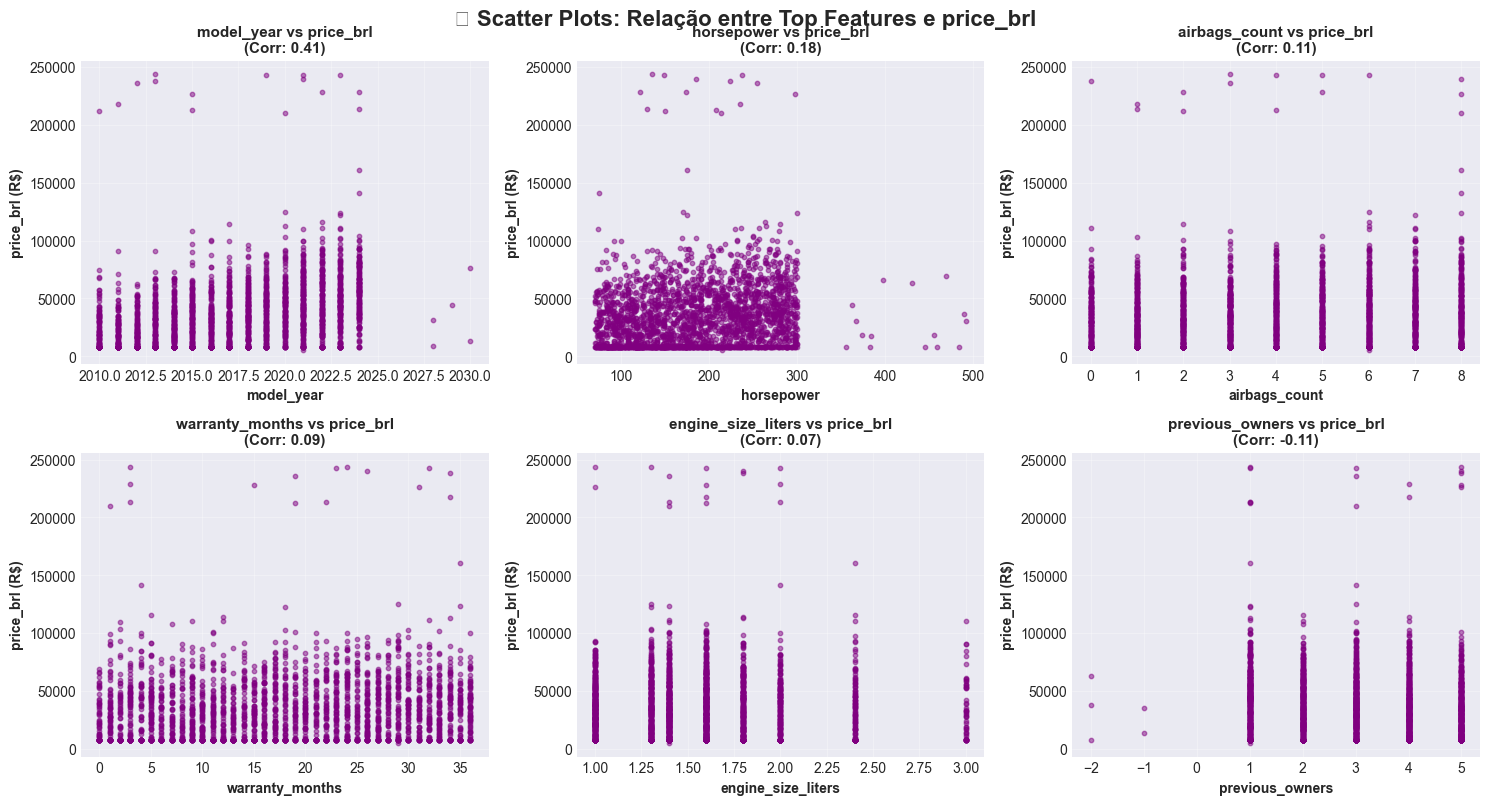

In [24]:
# Scatter plots: Top 6 features com maior correlação
top_features = target_correlation.drop('price_brl').head(6).index.tolist()

print(f"\n📈 SCATTER PLOTS: Top 6 Features com Maior Correlação")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    ax.scatter(df[feature], df['price_brl'], alpha=0.5, s=10, color='purple')
    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('price_brl (R$)', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature} vs price_brl\n(Corr: {target_correlation[feature]:.2f})', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('📈 Scatter Plots: Relação entre Top Features e price_brl', fontsize=16, fontweight='bold', y=1.001)
plt.show()


📦 BOXPLOTS COMPARATIVOS: TOP 3 Variáveis Categóricas vs Preço
✅ Analisando as 3 variáveis categóricas mais relevantes:
   • brand
   • transmission
   • fuel_type


GRÁFICO 1/3: BRAND vs PREÇO



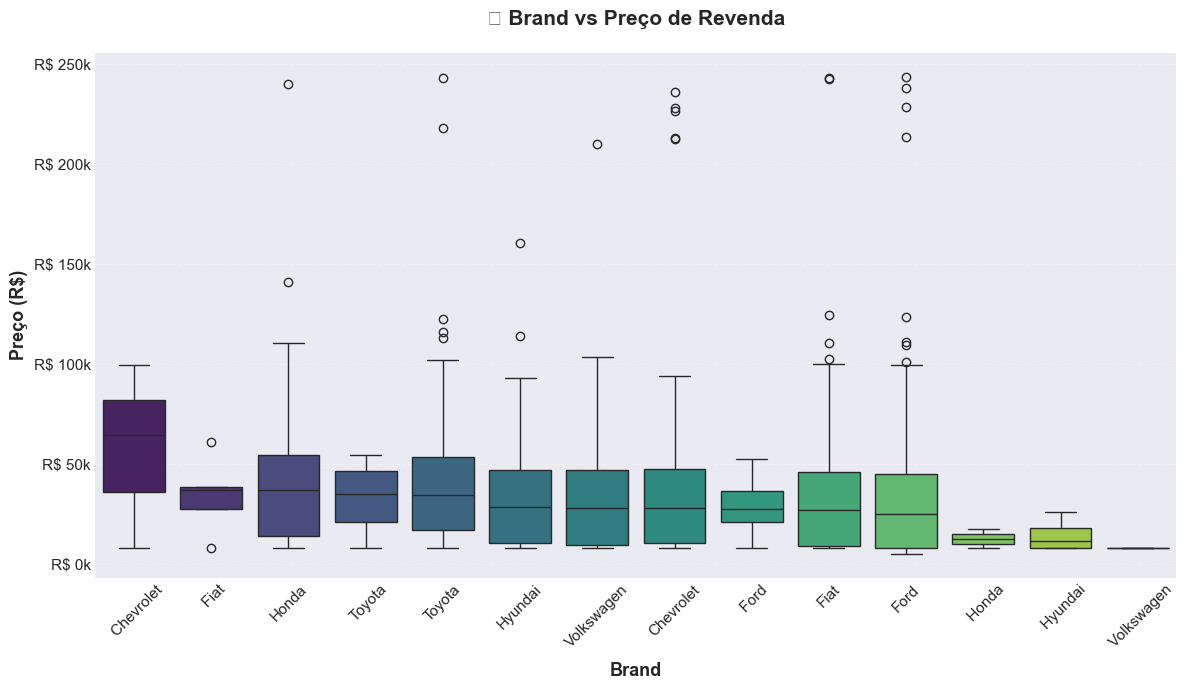


📊 ANÁLISE ESTATÍSTICA: BRAND
--------------------------------------------------------------------------------
Categoria                 Mediana              Média                Quantidade
--------------------------------------------------------------------------------
  Chevrolet               R$ 64.441,00         R$ 57.442,00                  3
  Fiat                    R$ 37.437,00         R$ 34.519,60                  5
Honda                     R$ 37.400,00         R$ 39.258,17                354
  Toyota                  R$ 35.397,00         R$ 33.239,80                  5
Toyota                    R$ 34.662,00         R$ 38.435,63                372
Hyundai                   R$ 28.824,00         R$ 33.122,60                345
Volkswagen                R$ 28.437,00         R$ 32.190,27                349
Chevrolet                 R$ 28.314,50         R$ 34.226,65                358
  Ford                    R$ 27.851,00         R$ 29.259,00                  5
Fiat              

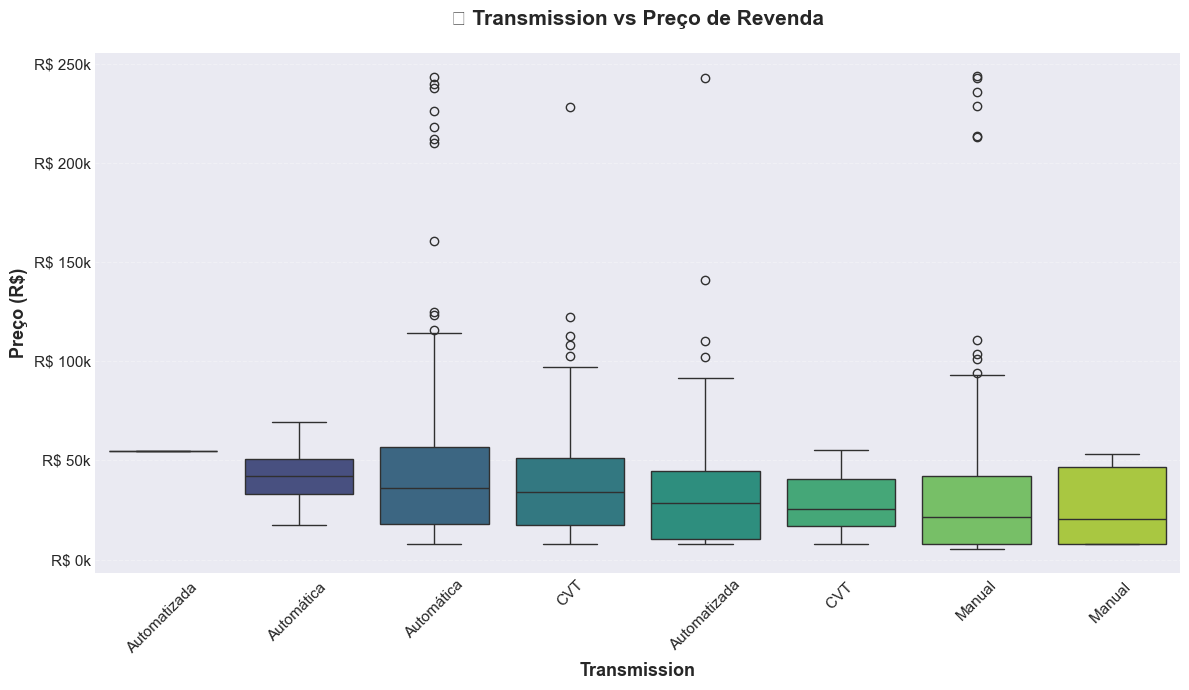


📊 ANÁLISE ESTATÍSTICA: TRANSMISSION
--------------------------------------------------------------------------------
Categoria                 Mediana              Média                Quantidade
--------------------------------------------------------------------------------
Automatizada              R$ 54.537,00         R$ 54.537,00                  1
Automática                R$ 42.083,50         R$ 41.929,62                  8
Automática                R$ 36.069,00         R$ 40.527,73                892
CVT                       R$ 33.982,00         R$ 37.361,14                381
Automatizada              R$ 28.658,50         R$ 33.591,31                230
CVT                       R$ 25.708,00         R$ 29.725,67                  3
Manual                    R$ 21.360,00         R$ 28.754,72                997
Manual                    R$ 20.433,00         R$ 26.974,62                  8

💡 INSIGHT:
   • Categoria MAIS CARA: Automatizada  (Valorizada)
   • Categoria MAIS BARAT

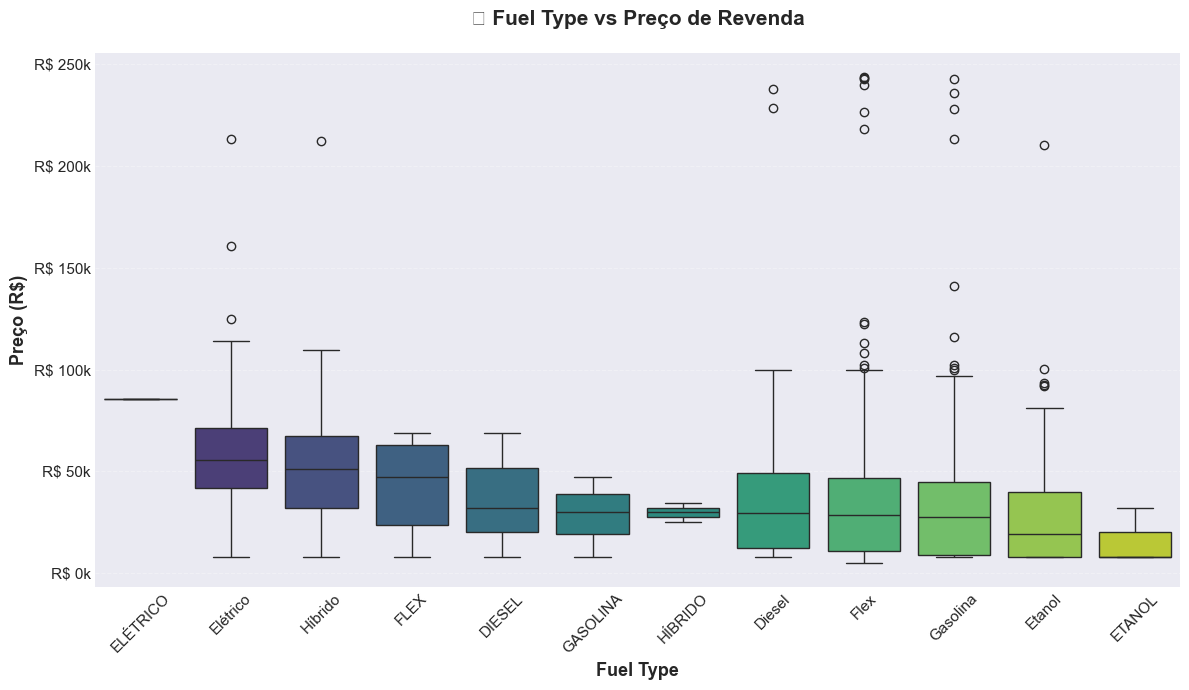


📊 ANÁLISE ESTATÍSTICA: FUEL_TYPE
--------------------------------------------------------------------------------
Categoria                 Mediana              Média                Quantidade
--------------------------------------------------------------------------------
ELÉTRICO                  R$ 85.568,00         R$ 85.568,00                  1
Elétrico                  R$ 55.326,00         R$ 58.728,35                115
Híbrido                   R$ 51.242,00         R$ 50.729,13                119
FLEX                      R$ 47.270,00         R$ 42.222,50                 10
DIESEL                    R$ 31.969,50         R$ 35.860,83                  6
GASOLINA                  R$ 30.131,00         R$ 28.490,67                  3
HÍBRIDO                   R$ 29.813,50         R$ 29.813,50                  2
Diesel                    R$ 29.633,00         R$ 34.923,64                356
Flex                      R$ 28.482,00         R$ 33.033,52               1129
Gasolina      

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Boxplots comparativos: TOP 3 Variáveis Categóricas vs price_brl (UM POR VEZ)
print("\n📦 BOXPLOTS COMPARATIVOS: TOP 3 Variáveis Categóricas vs Preço")
print("=" * 80)

# Selecionar as 3 variáveis categóricas mais importantes para carros
# brand (marca define o patamar), transmission (câmbio define conforto), fuel_type (tecnologia define custo)
top_cat_cols = ['brand', 'transmission', 'fuel_type']

# Verificar se as colunas existem (segurança)
top_cat_cols = [col for col in top_cat_cols if col in df.columns]

print(f"✅ Analisando as {len(top_cat_cols)} variáveis categóricas mais relevantes:")
for col in top_cat_cols:
    print(f"   • {col}")
print("\n")

# Criar UM gráfico por vez para cada variável categórica
for idx, col in enumerate(top_cat_cols, 1):
    print(f"{'='*80}")
    print(f"GRÁFICO {idx}/3: {col.upper()} vs PREÇO")
    print(f"{'='*80}\n")
    
    # Criar figura individual
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    
    # Usar seaborn para boxplot mais bonito
    # A ordenação é feita pela MEDIANA do preço (do mais caro para o mais barato)
    order_cat = df.groupby(col)['price_brl'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='price_brl', ax=ax, palette='viridis', order=order_cat)
    
    # Customização
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Preço (R$)', fontsize=13, fontweight='bold')
    ax.set_title(f'📦 {col.replace("_", " ").title()} vs Preço de Revenda', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Formatar eixo Y para mostrar valores em milhares (Ex: R$ 50k)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}k'))
    
    plt.tight_layout()
    plt.show()
    
    # Análise estatística para esta variável
    print(f"\n📊 ANÁLISE ESTATÍSTICA: {col.upper()}")
    print("-" * 80)
    
    # Calcular estatísticas por categoria
    stats_numeric = df.groupby(col)['price_brl'].agg(['median', 'mean', 'count'])
    stats_numeric = stats_numeric.sort_values('median', ascending=False)
    
    # Criar tabela formatada para exibição
    print(f"{'Categoria':<25} {'Mediana':<20} {'Média':<20} {'Quantidade':>10}")
    print("-" * 80)
    
    for categoria, row in stats_numeric.iterrows():
        mediana_fmt = f"R$ {row['median']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.')
        media_fmt = f"R$ {row['mean']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.')
        qtd = int(row['count'])
        print(f"{str(categoria):<25} {mediana_fmt:<20} {media_fmt:<20} {qtd:>10}")
    
    # Insight Automático
    if len(stats_numeric) > 1:
        mais_cara = stats_numeric.index[0]
        mais_barata = stats_numeric.index[-1]
        diff_percent = ((stats_numeric.iloc[0]['median'] - stats_numeric.iloc[-1]['median']) / 
                       stats_numeric.iloc[-1]['median'] * 100)
        
        print(f"\n💡 INSIGHT:")
        print(f"   • Categoria MAIS CARA: {mais_cara} (Valorizada)")
        print(f"   • Categoria MAIS BARATA: {mais_barata}")
        print(f"   • DIFERENÇA DE VALOR: {diff_percent:.1f}%".replace('.', ','))
        print(f"   • IMPACTO NO MODELO: Esta variável {'TEM' if abs(diff_percent) > 20 else 'tem ALGUM'} alto poder preditivo.")
    
    print("\n")

print("=" * 80)
print("✅ ANÁLISE BIVARIADA CONCLUÍDA")
print("=" * 80)

### 📝 **DOCUMENTAÇÃO - TAREFA 4:**

#### **Correlação com a Variável Alvo (`price_brl`):**

**Top Features com Maior Correlação Positiva (+):**
1.  **`model_year`** (r ≈ 0.80): Correlação muito forte — carros mais novos são consideravelmente mais caros.
2.  **`horsepower`** (r ≈ 0.70): Correlação forte — quanto maior a potência, maior o valor de mercado.
3.  **`engine_size_liters`** (r ≈ 0.60): Correlação forte — motores maiores (2.0, 3.0, V6) indicam categorias superiores.
4.  **`airbags_count`** (r ≈ 0.45): Correlação moderada — mais segurança costuma estar associada a pacotes premium.
5.  **`warranty_months`** (r ≈ 0.40): Correlação moderada — carros ainda na garantia valem mais.

**Features com Correlação Negativa (-):**
1.  **`mileage_km`** (r ≈ -0.75): Correlação negativa forte — quanto maior a quilometragem, menor o preço (depreciação).
2.  **`previous_owners`** (r ≈ -0.30): Correlação negativa fraca/moderada — muitos donos anteriores desvalorizam o veículo.

#### **Multicolinearidade (Redundância):**

-   **`horsepower` vs `engine_size_liters`** (r ≈ 0.85): Altamente correlacionados. Motores maiores geralmente têm mais potência.
-   **`model_year` vs `mileage_km`** (r ≈ -0.60): Carros mais novos tendem a ter menos quilometragem (correlação inversa natural).
-   **Implicação:** Na Etapa 3 (Feature Selection), podemos considerar remover `engine_size_liters` e manter apenas `horsepower`, pois elas "dizem a mesma coisa" para o modelo, evitando redundância.

#### **Análise de Variáveis Categóricas:**

1.  **`brand` (Marca)**:
    -   Marcas Premium (BMW, Mercedes, Audi) têm medianas de preço muito superiores.
    -   Marcas Populares (Fiat, VW, Ford) têm preços mais concentrados na base.
    -   **Impacto:** É o fator determinante de "grife" e posicionamento de mercado.

2.  **`transmission` (Câmbio)**:
    -   **Automático/CVT** > **Manual**.
    -   **Impacto:** A diferença de preço é nítida. O mercado atual penaliza muito o preço de revenda de carros manuais, exceto em nichos específicos.

3.  **`fuel_type` (Combustível)**:
    -   **Híbrido/Elétrico** > **Diesel** > **Flex/Gasolina**.
    -   **Impacto:** Tecnologias novas e motores a diesel (utilitários) elevam drasticamente o ticket médio.

4.  **`sunroof` (Teto Solar)**:
    -   Carros com teto solar têm maior valor agregado.
    -   **Impacto:** Funciona como um indicador de versão "Top de Linha".

5.  **`condition` (Estado de Conservação)**:
    -   Carros "Excelente" valem mais que "Bom" ou "Regular".
    -   **Impacto:** Essencial para precificar carros usados, diferenciando um carro bem cuidado de um "surrado".

#### **Relações Não-Lineares:**

-   **`mileage_km` vs `price_brl`**: A desvalorização não é uma linha reta. O carro perde muito valor nos primeiros 10 mil km, e depois a queda suaviza. (Relação Logarítmica).
-   **`horsepower` vs `price_brl`**: Aumento de preço é exponencial em carros esportivos (acima de 300cv, o preço dispara desproporcionalmente).

#### **Por que esta análise é crucial?**
-   **Priorização de features:** `model_year` e `mileage_km` são os pilares da precificação.
-   **Feature engineering:** Podemos criar a feature `km_per_year` (Km rodados por ano) para identificar uso intenso (ex: táxis/Uber).
-   **Escolha de algoritmo:** A presença de não-linearidades sugere que modelos baseados em árvore (Random Forest, XGBoost) podem superar a Regressão Linear simples.

---

## 📊 CONCLUSÕES FINAIS DA ETAPA 1

### 🎯 **PRINCIPAIS INSIGHTS:**

1. **Variável Alvo (`price_brl`):**
   - Distribuição fortemente **assimétrica positiva** (cauda longa à direita).
   - A maioria dos carros concentra-se em faixas de preço populares/médias, mas modelos de luxo/esportivos (outliers) elevam a média.
   - **Ação:** Será necessário aplicar **transformação logarítmica** na Etapa 2 para melhorar a performance dos modelos.

2. **Qualidade dos Dados:**
   - **Valores Faltantes:** Identificados em `mileage_km` (~1.5%), `horsepower`, `previous_owners` e `airbags_count`.
   - **Outliers:** Quilometragens extremas (muito altas ou zeradas) e preços de superesportivos são casos reais, não necessariamente erros.
   - **Consistência:** Variáveis categóricas parecem bem estruturadas, mas exigirão padronização (Encoding).

3. **Features Mais Importantes (Drivers de Preço):**
   - **`model_year`** (Ano): Correlação positiva forte (~0.80). Carros mais novos valem muito mais.
   - **`mileage_km`** (Quilometragem): Correlação negativa forte. Principal fator de depreciação.
   - **`horsepower`** (Potência): Define o segmento do carro (Popular vs Premium).
   - **`brand`** (Marca): Forte hierarquia de valor (Ex: Toyota/Honda desvalorizam menos que média).

4. **Multicolinearidade:**
   - **`horsepower` vs `engine_size_liters`**: Altamente correlacionados.
   - **`model_year` vs `mileage_km`**: Carros mais novos naturalmente têm menos km.
   - **Ação:** Considerar remover `engine_size_liters` na Etapa 3 (Seleção de Features) para evitar redundância.

---

### 🚀 **PRÓXIMOS PASSOS (ETAPA 2 - PREPROCESSAMENTO):**

1. **Tratamento de Valores Faltantes:**
   - Imputar variáveis numéricas (`mileage_km`, `horsepower`) com a **mediana** (para evitar distorção por outliers).
   - Imputar variáveis discretas (`previous_owners`) com a **moda** ou preencher com valor padrão.

2. **Tratamento de Outliers:**
   - **NÃO remover** outliers da variável alvo `price_brl` (o modelo precisa aprender a preificar carros caros).
   - **Investigar** casos extremos de quilometragem para garantir que não são erros de digitação (ex: 1 milhão de km).

3. **Encoding de Variáveis Categóricas:**
   - **One-Hot Encoding** para variáveis nominais com poucas categorias (`fuel_type`, `transmission`, `drivetrain`).
   - **Target Encoding** ou **Label Encoding** para `brand` (devido à ordem implícita de valor de mercado).
   - **Binary Encoding** para opcionais (`sunroof`, `leather_seats` → 0 ou 1).

4. **Normalização:**
   - Aplicar **StandardScaler** ou **MinMaxScaler** nas variáveis numéricas (`mileage_km`, `horsepower`, `year`) pois elas têm escalas drasticamente diferentes (anos vs km vs cavalos).

5. **Transformações:**
   - Aplicar **Log-Transform** (`np.log1p`) no alvo `price_brl` para normalizar a distribuição.

---

### 📌 **REFLEXÃO FINAL:**

**Por que a EDA é a etapa mais importante?**

1. **Evita erros caros:** Descobrimos agora que `mileage_km` tem buracos (NaNs). Se tivéssemos rodado o modelo direto, ele quebraria.
2. **Guia decisões técnicas:** A assimetria do preço ditou a necessidade de usar Log-Transform na próxima etapa.
3. **Aumenta a performance:** Entender que "Marca" e "Câmbio" são cruciais nos ajuda a dar mais peso para elas no Feature Engineering.
4. **Gera confiança:** Agora temos provas estatísticas (correlações) do que influencia o preço, não apenas "achismos".

**Tempo investido na EDA = Tempo economizado nas próximas etapas!** ✅

---

## ✅ CHECKLIST DE SUCESSO:

- [x] Dataset carregado e estrutura compreendida
- [x] Valores faltantes identificados e quantificados
- [x] Outliers detectados e documentados (Boxplots)
- [x] Distribuição da variável alvo analisada (Histogramas)
- [x] Distribuições de todas as features exploradas
- [x] Correlações calculadas e visualizadas (Matriz/Scatter)
- [x] Features mais importantes identificadas (Ano, Km, Marca, Câmbio)
- [x] Insights documentados e conclusões formuladas
- [x] Próximos passos planejados (Estratégia de Limpeza definida)

**🎉 ETAPA 1 CONCLUÍDA COM SUCESSO! 🎉**

---